## mount the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Libraries

In [2]:
pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 6.4 MB/s eta 0:00:00


In [3]:
from __future__ import division
from IPython.display import clear_output
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import concatenate
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import ConvLSTM2D
from keras.layers import Dropout
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import Reshape
from keras.layers import UpSampling2D
from keras.models import Model
from skimage import data
from scipy import ndimage
from skimage import filters
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf
import tensorflow_addons as tfa
import keras
import pickle


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


## Prepare the data

In [4]:
input_lung = np.load('/content/drive/MyDrive/finalMosmedDatasetPreProcessed/2D_images_after_GAN/380:/input_lung.npy')
out_gan = np.load('/content/drive/MyDrive/finalMosmedDatasetPreProcessed/2D_images_after_GAN/380:/output_lung_gen.npy')
differentiated_lung = input_lung - out_gan

In [36]:
a = input_lung[3:4,:,:,:]
a.shape



(1, 128, 128, 1)

In [38]:
a = input_lung[3,:,:,:]
a.shape

(128, 128, 1)

In [44]:
#for i in range(len(input_lung[0, 0])):
a = 0
for i in range(12160 ):
  if 95 < np.sum(differentiated_lung[i,:,:,0])  : print(np.sum(differentiated_lung[i,:,:,0])) ; a+=1 ; print(i)
print(a)

141.49219933656718
6
192.05269586263043
9
195.7499978096082
10
215.3053391441442
12
122.5065376385521
13
115.27476940876181
28
95.74217249677068
34
135.35647731859657
35
135.63861689854244
41
102.64910991343844
64
165.55282180152443
65
401.48145844784403
68
142.2936075472712
71
130.75291436033456
97
307.47302132046866
98
341.36238562369715
99
151.4085670238763
100
358.1918789545163
102
393.6150851070115
103
201.0919198520278
138
116.61512814813912
163
96.56260503089518
165
229.8631449243444
168
305.6085206243744
169
229.60384416119763
170
114.3312777674002
173
106.7146257903159
174
106.79709043683229
175
109.44666217135392
177
106.69368763174892
185
112.27795566885507
189
160.39007877427144
200
329.2184908874775
201
155.25502690158604
202
106.9044769417828
215
123.24209766650011
221
126.50907745399596
226
114.26423490820466
227
155.2584829170181
229
425.96002940510056
230
421.10288998672615
231
111.25095526544821
249
155.42729024267246
265
384.38264235420274
288
220.92724382417163
289


In [5]:
#### creating pseudo mask
sum = []
counter1=0
x_train_hi = np.zeros((0,128,128,1))
x_train_lo = np.zeros((0,128,128,1))
m_train_hi = np.zeros((0,128,128,1))
m_train_lo = np.zeros((0,128,128,1))

for i in tqdm(range(differentiated_lung.shape[0])):
    sum.append(np.sum(differentiated_lung[i,:,:,:]))
    if(sum[-1]>95):
        x_train_hi = np.append(x_train_hi,input_lung[i:i+1,:,:,:],axis=0)
        m_train_hi = np.append(m_train_hi,differentiated_lung[i:i+1,:,:,:],axis=0)
        counter1+=1
        print(counter1)

sum = []
counter=0
for i in tqdm(range(differentiated_lung.shape[0])):
    sum.append(np.sum(differentiated_lung[i,:,:,:]))
    if(65<sum[-1]<80):
        x_train_lo = np.append(x_train_lo,input_lung[i:i+1,:,:,:],axis=0)
        m_train_lo = np.append(m_train_lo,differentiated_lung[i:i+1,:,:,:],axis=0)
        counter+=1
        counter=0


  1%|▏         | 176/13632 [00:00<00:07, 1691.63it/s]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45


  3%|▎         | 346/13632 [00:00<00:15, 845.09it/s] 

46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72


  3%|▎         | 453/13632 [00:00<00:20, 642.78it/s]

73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89


  4%|▍         | 531/13632 [00:00<00:20, 638.95it/s]

90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106


  4%|▍         | 603/13632 [00:00<00:26, 486.89it/s]

107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123


  5%|▍         | 660/13632 [00:01<00:33, 387.33it/s]

124
125
126
127
128
129
130
131
132
133
134
135


  5%|▌         | 715/13632 [00:01<00:31, 411.50it/s]

136
137
138
139
140
141
142
143
144
145
146
147
148
149

  6%|▌         | 805/13632 [00:01<00:35, 365.01it/s]


150
151
152
153
154
155
156
157
158
159
160


  6%|▌         | 844/13632 [00:01<00:35, 362.66it/s]

161
162
163
164
165
166
167
168
169
170
171


  7%|▋         | 920/13632 [00:02<00:37, 334.62it/s]

172
173
174
175
176
177
178
179
180


  8%|▊         | 1027/13632 [00:02<00:31, 395.86it/s]

181
182
183
184
185
186
187
188
189


  8%|▊         | 1154/13632 [00:02<00:25, 493.57it/s]

190
191
192
193
194
195
196
197
198


  9%|▉         | 1204/13632 [00:02<00:28, 432.85it/s]

199
200
201
202
203
204
205
206
207


  9%|▉         | 1289/13632 [00:02<00:33, 363.61it/s]

208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225


 10%|▉         | 1358/13632 [00:03<00:49, 248.31it/s]

226
227
228
229
230
231
232
233
234


 10%|█         | 1422/13632 [00:03<00:48, 252.29it/s]

235
236
237
238
239
240
241
242


 11%|█         | 1450/13632 [00:03<00:55, 221.01it/s]

243
244
245
246
247
248
249
250


 11%|█         | 1474/13632 [00:03<01:06, 182.59it/s]

251
252
253
254
255
256
257
258


 11%|█         | 1526/13632 [00:04<01:02, 192.64it/s]

259
260
261
262
263
264
265
266


 11%|█▏        | 1554/13632 [00:04<00:58, 206.63it/s]

267
268
269
270
271
272
273
274


 12%|█▏        | 1576/13632 [00:04<01:06, 182.61it/s]

275
276
277
278
279
280
281
282


 12%|█▏        | 1612/13632 [00:04<01:29, 134.31it/s]

283
284
285
286
287
288
289
290


 12%|█▏        | 1628/13632 [00:05<01:34, 127.37it/s]

291
292
293
294
295
296
297


 12%|█▏        | 1675/13632 [00:05<01:12, 165.22it/s]

298
299
300
301
302
303
304


 13%|█▎        | 1765/13632 [00:05<00:41, 284.91it/s]

305
306
307
308
309
310
311


 13%|█▎        | 1824/13632 [00:05<00:44, 262.71it/s]

312
313
314
315
316
317
318
319
320
321
322
323
324
325


 14%|█▍        | 1893/13632 [00:06<00:52, 223.94it/s]

326
327
328
329
330
331
332


 14%|█▍        | 1919/13632 [00:06<00:57, 202.67it/s]

333
334
335
336
337
338


 14%|█▍        | 1942/13632 [00:06<01:22, 142.19it/s]

339
340
341
342
343
344


 14%|█▍        | 1960/13632 [00:06<01:32, 126.15it/s]

345
346
347
348
349
350


 15%|█▍        | 1992/13632 [00:07<01:27, 133.19it/s]

351
352
353
354
355
356


 15%|█▍        | 2020/13632 [00:07<01:11, 161.48it/s]

357
358
359
360
361
362


 15%|█▍        | 2039/13632 [00:07<01:33, 123.89it/s]

363
364
365
366
367
368


 16%|█▌        | 2120/13632 [00:07<00:53, 214.85it/s]

369
370
371
372
373
374


 16%|█▌        | 2188/13632 [00:07<00:44, 255.21it/s]

375
376
377
378
379
380


 16%|█▋        | 2243/13632 [00:08<00:46, 247.07it/s]

381
382
383
384
385
386
387
388
389
390
391


 17%|█▋        | 2269/13632 [00:08<01:28, 129.10it/s]

392
393
394
395
396


 17%|█▋        | 2289/13632 [00:08<01:35, 119.02it/s]

397
398
399
400
401


 17%|█▋        | 2341/13632 [00:08<01:14, 151.03it/s]

402
403
404
405
406


 17%|█▋        | 2360/13632 [00:09<01:19, 141.48it/s]

407
408
409
410


 17%|█▋        | 2377/13632 [00:09<01:29, 125.55it/s]

411
412
413
414
415


 18%|█▊        | 2392/13632 [00:09<01:46, 105.98it/s]

416
417
418
419
420


 18%|█▊        | 2441/13632 [00:09<01:16, 145.77it/s]

421
422
423
424
425


 18%|█▊        | 2470/13632 [00:09<01:07, 165.75it/s]

426
427
428
429
430
431
432
433
434
435


 18%|█▊        | 2504/13632 [00:10<01:52, 99.14it/s] 

436
437
438
439
440
441
442
443
444
445


 19%|█▊        | 2531/13632 [00:10<02:16, 81.13it/s]

446
447
448
449
450


 19%|█▊        | 2541/13632 [00:11<02:41, 68.66it/s]

451
452
453
454
455


 19%|█▊        | 2550/13632 [00:11<02:56, 62.80it/s]

456
457
458
459
460


 19%|█▉        | 2599/13632 [00:11<01:33, 118.44it/s]

461
462
463
464


 20%|█▉        | 2665/13632 [00:11<00:58, 189.05it/s]

465
466
467
468


 20%|█▉        | 2718/13632 [00:12<00:50, 216.48it/s]

469
470
471
472
473
474
475
476
477


 20%|██        | 2742/13632 [00:12<01:13, 148.79it/s]

478
479
480
481
482


 20%|██        | 2762/13632 [00:12<01:35, 114.07it/s]

483
484
485
486
487


 20%|██        | 2794/13632 [00:12<01:42, 105.32it/s]

488
489
490
491


 21%|██        | 2822/13632 [00:13<01:39, 108.99it/s]

492
493
494
495


 21%|██        | 2853/13632 [00:13<01:25, 125.92it/s]

496
497
498
499


 21%|██        | 2883/13632 [00:13<01:25, 126.11it/s]

500
501
502
503
504
505
506
507


 21%|██▏       | 2908/13632 [00:14<02:02, 87.73it/s]

508
509
510
511


 22%|██▏       | 2940/13632 [00:14<01:20, 133.47it/s]

512
513
514
515


 22%|██▏       | 2956/13632 [00:14<01:55, 92.45it/s] 

516
517
518
519


 22%|██▏       | 2988/13632 [00:14<01:37, 108.99it/s]

520
521
522
523


 22%|██▏       | 3039/13632 [00:15<01:07, 156.94it/s]

524
525
526
527
528
529
530
531


 22%|██▏       | 3057/13632 [00:15<01:49, 96.57it/s] 

532
533
534
535


 23%|██▎       | 3096/13632 [00:15<01:27, 120.33it/s]

536
537
538
539


 23%|██▎       | 3162/13632 [00:15<00:59, 175.44it/s]

540
541
542
543
544
545
546
547


 23%|██▎       | 3202/13632 [00:16<01:30, 115.84it/s]

548
549
550
551
552
553
554
555


 24%|██▍       | 3238/13632 [00:16<01:49, 94.56it/s]

556
557
558
559


 24%|██▍       | 3274/13632 [00:17<01:19, 130.70it/s]

560
561
562
563


 24%|██▍       | 3292/13632 [00:17<01:41, 101.70it/s]

564
565
566
567


 24%|██▍       | 3333/13632 [00:17<01:22, 124.23it/s]

568
569
570
571


 25%|██▍       | 3349/13632 [00:17<01:29, 114.78it/s]

572
573
574
575


 25%|██▍       | 3364/13632 [00:17<01:27, 117.51it/s]

576
577
578
579


 25%|██▍       | 3378/13632 [00:18<02:08, 79.83it/s] 

580
581
582
583


 25%|██▍       | 3389/13632 [00:18<02:40, 63.89it/s]

584
585
586
587


 25%|██▌       | 3432/13632 [00:18<01:28, 114.65it/s]

588
589
590
591


 25%|██▌       | 3464/13632 [00:19<01:32, 109.94it/s]

592
593
594
595


 26%|██▌       | 3491/13632 [00:19<01:15, 133.44it/s]

596
597
598
599


 26%|██▌       | 3528/13632 [00:19<01:25, 118.57it/s]

600
601
602
603


 26%|██▋       | 3589/13632 [00:19<00:54, 183.18it/s]

604
605
606
607


 27%|██▋       | 3624/13632 [00:19<00:47, 209.06it/s]

608
609
610
611


 27%|██▋       | 3667/13632 [00:20<01:05, 151.66it/s]

612
613
614
615


 27%|██▋       | 3684/13632 [00:20<01:07, 148.42it/s]

616
617
618
619


 27%|██▋       | 3713/13632 [00:20<01:36, 102.69it/s]

620
621
622
623
624
625
626
627


 28%|██▊       | 3754/13632 [00:21<01:34, 104.60it/s]

628
629
630
631


 28%|██▊       | 3768/13632 [00:21<02:05, 78.91it/s] 

632
633
634
635


 28%|██▊       | 3785/13632 [00:21<01:50, 89.26it/s]

636
637
638
639


 28%|██▊       | 3814/13632 [00:22<01:54, 85.86it/s]

640
641
642
643


 28%|██▊       | 3840/13632 [00:22<01:46, 92.34it/s]

644
645
646
647
648
649
650


 28%|██▊       | 3851/13632 [00:22<02:33, 63.87it/s]

651
652
653


 29%|██▊       | 3889/13632 [00:23<01:47, 90.22it/s]

654
655
656


 29%|██▉       | 3943/13632 [00:23<01:07, 142.69it/s]

657
658
659
660


 29%|██▉       | 3959/13632 [00:23<01:20, 120.16it/s]

661
662
663
664


 29%|██▉       | 3973/13632 [00:23<01:22, 116.57it/s]

665
666
667
668
669
670
671


 29%|██▉       | 3986/13632 [00:24<02:47, 57.45it/s] 

672
673
674
675


 29%|██▉       | 3996/13632 [00:24<02:40, 59.98it/s]

676
677
678


 29%|██▉       | 4013/13632 [00:24<02:52, 55.90it/s]

679
680
681


 30%|██▉       | 4040/13632 [00:24<01:51, 86.00it/s]

682
683
684


 30%|██▉       | 4074/13632 [00:25<01:37, 98.49it/s] 

685
686
687


 30%|██▉       | 4085/13632 [00:25<01:56, 82.09it/s]

688
689
690
691
692
693


 30%|███       | 4095/13632 [00:25<02:45, 57.68it/s]

694
695
696


 30%|███       | 4103/13632 [00:26<03:19, 47.73it/s]

697
698
699


 30%|███       | 4127/13632 [00:26<02:13, 70.94it/s]

700
701
702


 30%|███       | 4136/13632 [00:26<02:33, 61.76it/s]

703
704
705


 31%|███       | 4166/13632 [00:26<02:01, 77.91it/s]

706
707
708
709
710
711


 31%|███       | 4175/13632 [00:27<02:59, 52.56it/s]

712
713
714


 31%|███       | 4234/13632 [00:27<01:26, 108.51it/s]

715
716
717


 31%|███▏      | 4261/13632 [00:27<01:17, 120.83it/s]

718
719
720
721
722
723


 32%|███▏      | 4295/13632 [00:28<01:44, 89.00it/s]

724
725
726


 32%|███▏      | 4330/13632 [00:28<01:30, 102.58it/s]

727
728
729
730
731
732


 32%|███▏      | 4357/13632 [00:28<01:55, 80.31it/s]

733
734
735
736
737
738


 32%|███▏      | 4367/13632 [00:29<02:49, 54.59it/s]

739
740
741


 32%|███▏      | 4389/13632 [00:29<02:31, 61.13it/s]

742
743
744


 32%|███▏      | 4413/13632 [00:29<01:51, 82.41it/s]

745
746
747


 33%|███▎      | 4432/13632 [00:30<02:13, 68.76it/s]

748
749
750


 33%|███▎      | 4451/13632 [00:30<01:52, 81.73it/s]

751
752
753


 33%|███▎      | 4460/13632 [00:30<02:41, 56.95it/s]

754
755
756


 33%|███▎      | 4484/13632 [00:30<01:57, 78.02it/s]

757
758
759


 33%|███▎      | 4494/13632 [00:31<02:19, 65.63it/s]

760
761
762


 33%|███▎      | 4516/13632 [00:31<01:51, 81.51it/s]

763
764
765
766
767
768


 33%|███▎      | 4526/13632 [00:31<03:23, 44.80it/s]

769
770
771
772
773
774


 33%|███▎      | 4550/13632 [00:32<03:10, 47.71it/s]

775
776
777
778
779
780


 33%|███▎      | 4558/13632 [00:32<04:18, 35.07it/s]

781
782
783


 33%|███▎      | 4566/13632 [00:32<04:00, 37.67it/s]

784
785
786


 34%|███▎      | 4586/13632 [00:33<03:06, 48.39it/s]

787
788
789


 34%|███▍      | 4613/13632 [00:33<01:57, 76.91it/s]

790
791
792


 34%|███▍      | 4623/13632 [00:33<02:34, 58.45it/s]

793
794
795


 34%|███▍      | 4631/13632 [00:33<02:57, 50.64it/s]

796
797
798


 34%|███▍      | 4651/13632 [00:34<02:13, 67.10it/s]

799
800
801


 34%|███▍      | 4699/13632 [00:34<01:28, 100.64it/s]

802
803
804


 35%|███▍      | 4712/13632 [00:34<01:34, 94.26it/s] 

805
806
807


 35%|███▌      | 4773/13632 [00:34<00:59, 148.52it/s]

808
809
810


 35%|███▌      | 4789/13632 [00:35<01:06, 133.15it/s]

811
812
813


 35%|███▌      | 4807/13632 [00:35<01:10, 125.27it/s]

814
815
816


 35%|███▌      | 4835/13632 [00:35<01:31, 95.71it/s]

817
818
819


 36%|███▌      | 4846/13632 [00:35<01:40, 87.79it/s]

820
821
822


 36%|███▌      | 4869/13632 [00:36<01:25, 102.51it/s]

823
824
825


 36%|███▌      | 4880/13632 [00:36<02:16, 64.26it/s] 

826
827
828


 36%|███▌      | 4904/13632 [00:36<01:47, 80.87it/s]

829
830
831


 36%|███▌      | 4914/13632 [00:36<02:08, 67.60it/s]

832
833
834


 36%|███▌      | 4941/13632 [00:37<01:56, 74.72it/s]

835
836
837


 36%|███▋      | 4970/13632 [00:37<01:26, 100.42it/s]

838
839
840


 37%|███▋      | 4996/13632 [00:37<01:14, 115.54it/s]

841
842
843


 37%|███▋      | 5009/13632 [00:37<01:57, 73.17it/s] 

844
845
846


 37%|███▋      | 5028/13632 [00:38<01:45, 81.51it/s]

847
848
849
850
851
852


 37%|███▋      | 5090/13632 [00:38<01:21, 104.92it/s]

853
854
855
856
857
858


 37%|███▋      | 5105/13632 [00:39<01:53, 74.80it/s] 

859
860
861


 38%|███▊      | 5156/13632 [00:39<01:12, 116.74it/s]

862
863
864


 38%|███▊      | 5195/13632 [00:39<01:12, 116.73it/s]

865
866
867


 38%|███▊      | 5218/13632 [00:39<01:10, 119.93it/s]

868
869
870
871
872
873
874
875
876
877
878
879


 38%|███▊      | 5234/13632 [00:41<03:18, 42.22it/s] 

880
881
882


 38%|███▊      | 5245/13632 [00:41<03:07, 44.76it/s]

883
884
885


 39%|███▊      | 5255/13632 [00:41<03:29, 39.97it/s]

886
887
888
889
890
891

 39%|███▊      | 5263/13632 [00:42<04:22, 31.86it/s]


892
893


 39%|███▊      | 5275/13632 [00:42<04:08, 33.70it/s]

894
895
896


 39%|███▉      | 5290/13632 [00:42<03:12, 43.41it/s]

897
898


 39%|███▉      | 5304/13632 [00:43<03:06, 44.54it/s]

899
900
901


 39%|███▉      | 5310/13632 [00:43<03:55, 35.39it/s]

902
903
904


 39%|███▉      | 5319/13632 [00:43<03:10, 43.62it/s]

905
906
907

 39%|███▉      | 5325/13632 [00:43<03:31, 39.33it/s]


908
909


 39%|███▉      | 5330/13632 [00:44<05:03, 27.32it/s]

910
911
912


 39%|███▉      | 5354/13632 [00:44<03:08, 43.97it/s]

913
914
915


 39%|███▉      | 5377/13632 [00:44<01:51, 74.18it/s]

916
917
918
919
920
921


 40%|███▉      | 5411/13632 [00:45<02:04, 66.12it/s]

922
923
924


 40%|███▉      | 5424/13632 [00:45<02:36, 52.30it/s]

925
926
927


 40%|███▉      | 5443/13632 [00:45<01:57, 69.42it/s]

928
929
930
931


 40%|████      | 5466/13632 [00:46<02:22, 57.40it/s]

932
933


 40%|████      | 5476/13632 [00:46<02:27, 55.46it/s]

934
935
936


 40%|████      | 5510/13632 [00:46<01:49, 74.22it/s]

937
938
939


 41%|████      | 5524/13632 [00:47<01:49, 74.13it/s]

940
941
942


 41%|████      | 5541/13632 [00:47<02:16, 59.43it/s]

943
944
945
946
947
948


 41%|████      | 5548/13632 [00:47<04:00, 33.59it/s]

949
950
951


 41%|████      | 5578/13632 [00:48<02:02, 65.88it/s]

952
953


 42%|████▏     | 5664/13632 [00:48<00:52, 153.04it/s]

954
955
956
957
958
959


 42%|████▏     | 5693/13632 [00:48<01:15, 105.82it/s]

960
961
962
963
964
965


 42%|████▏     | 5715/13632 [00:49<01:37, 81.40it/s] 

966
967
968


 42%|████▏     | 5732/13632 [00:49<01:44, 75.73it/s]

969
970
971


 42%|████▏     | 5746/13632 [00:49<01:55, 68.17it/s]

972
973


 42%|████▏     | 5768/13632 [00:50<01:42, 76.94it/s]

974
975
976
977


 42%|████▏     | 5779/13632 [00:50<02:25, 53.80it/s]

978
979


 42%|████▏     | 5793/13632 [00:50<02:04, 62.89it/s]

980
981
982


 43%|████▎     | 5811/13632 [00:51<02:17, 56.79it/s]

983
984
985


 43%|████▎     | 5851/13632 [00:51<01:39, 78.38it/s]

986
987
988


 43%|████▎     | 5915/13632 [00:51<00:53, 144.31it/s]

989
990
991


 44%|████▎     | 5933/13632 [00:52<01:02, 122.85it/s]

992
993


 44%|████▎     | 5948/13632 [00:52<01:00, 126.44it/s]

994
995


 44%|████▍     | 5978/13632 [00:52<01:06, 115.85it/s]

996
997


 44%|████▍     | 5992/13632 [00:52<01:18, 97.59it/s] 

998
999


 44%|████▍     | 6019/13632 [00:52<01:08, 111.00it/s]

1000
1001
1002


 44%|████▍     | 6043/13632 [00:53<01:17, 97.57it/s]

1003
1004


 44%|████▍     | 6057/13632 [00:53<01:12, 105.19it/s]

1005
1006


 45%|████▍     | 6079/13632 [00:53<01:25, 88.78it/s]

1007
1008


 45%|████▍     | 6099/13632 [00:53<01:22, 90.78it/s]

1009
1010


 45%|████▍     | 6120/13632 [00:54<01:18, 95.27it/s]

1011
1012
1013
1014


 45%|████▌     | 6142/13632 [00:54<01:44, 71.65it/s]

1015
1016


 45%|████▌     | 6154/13632 [00:54<01:32, 81.20it/s]

1017
1018
1019
1020


 45%|████▌     | 6164/13632 [00:55<02:54, 42.68it/s]

1021
1022


 45%|████▌     | 6186/13632 [00:55<01:59, 62.24it/s]

1023
1024


 46%|████▌     | 6213/13632 [00:55<01:23, 88.37it/s]

1025
1026


 46%|████▌     | 6225/13632 [00:55<01:38, 75.27it/s]

1027
1028


 46%|████▌     | 6240/13632 [00:55<01:25, 86.51it/s]

1029
1030
1031
1032
1033


 46%|████▌     | 6251/13632 [00:56<02:38, 46.52it/s]

1034
1035


 46%|████▌     | 6259/13632 [00:56<03:11, 38.58it/s]

1036
1037


 46%|████▌     | 6279/13632 [00:56<02:07, 57.78it/s]

1038
1039
1040
1041


 46%|████▌     | 6289/13632 [00:57<03:13, 37.96it/s]

1042
1043


 46%|████▋     | 6311/13632 [00:57<02:14, 54.27it/s]

1044
1045


 46%|████▋     | 6332/13632 [00:57<01:47, 68.05it/s]

1046
1047


 47%|████▋     | 6351/13632 [00:58<01:40, 72.59it/s]

1048
1049


 47%|████▋     | 6371/13632 [00:58<01:14, 97.26it/s]

1050
1051
1052
1053


 47%|████▋     | 6382/13632 [00:58<02:36, 46.46it/s]

1054
1055
1056
1057


 47%|████▋     | 6409/13632 [00:59<02:08, 56.09it/s]

1058
1059
1060
1061


 47%|████▋     | 6429/13632 [00:59<02:21, 50.97it/s]

1062
1063


 48%|████▊     | 6506/13632 [01:00<00:44, 161.77it/s]

1064
1065


 48%|████▊     | 6529/13632 [01:00<00:42, 168.71it/s]

1066
1067


 48%|████▊     | 6551/13632 [01:00<01:01, 114.75it/s]

1068
1069


 48%|████▊     | 6568/13632 [01:00<01:10, 99.70it/s] 

1070
1071


 48%|████▊     | 6586/13632 [01:00<01:03, 110.89it/s]

1072
1073
1074
1075


 48%|████▊     | 6601/13632 [01:01<01:47, 65.19it/s] 

1076
1077
1078
1079
1080
1081
1082
1083


 49%|████▊     | 6622/13632 [01:02<02:40, 43.78it/s]

1084
1085


 49%|████▉     | 6660/13632 [01:02<01:27, 80.01it/s]

1086
1087
1088
1089


 49%|████▉     | 6674/13632 [01:02<02:00, 57.98it/s]

1090
1091


 49%|████▉     | 6686/13632 [01:03<01:47, 64.64it/s]

1092
1093
1094
1095


 49%|████▉     | 6697/13632 [01:03<02:41, 43.05it/s]

1096
1097
1098
1099
1100
1101


 49%|████▉     | 6705/13632 [01:04<03:41, 31.21it/s]

1102
1103
1104
1105


 49%|████▉     | 6716/13632 [01:04<04:10, 27.59it/s]

1106
1107


 49%|████▉     | 6725/13632 [01:04<03:20, 34.39it/s]

1108
1109


 49%|████▉     | 6747/13632 [01:05<02:16, 50.50it/s]

1110
1111


 50%|████▉     | 6755/13632 [01:05<02:30, 45.74it/s]

1112
1113
1114
1115
1116
1117


 50%|████▉     | 6770/13632 [01:06<03:23, 33.77it/s]

1118
1119


 50%|████▉     | 6786/13632 [01:06<02:32, 44.76it/s]

1120
1121
1122
1123


 50%|████▉     | 6793/13632 [01:06<03:50, 29.73it/s]

1124
1125


 50%|████▉     | 6806/13632 [01:06<03:00, 37.73it/s]

1126
1127


 50%|█████     | 6818/13632 [01:07<02:12, 51.24it/s]

1128
1129
1130
1131
1132
1133


 50%|█████     | 6825/13632 [01:07<04:28, 25.38it/s]

1134
1135


 50%|█████     | 6843/13632 [01:08<03:03, 36.96it/s]

1136
1137


 50%|█████     | 6878/13632 [01:08<01:32, 73.32it/s]

1138
1139
1140
1141


 51%|█████     | 6889/13632 [01:08<02:22, 47.35it/s]

1142
1143


 51%|█████     | 6921/13632 [01:08<01:20, 82.92it/s]

1144
1145


 51%|█████     | 6935/13632 [01:09<01:40, 66.31it/s]

1146
1147


 51%|█████     | 6952/13632 [01:09<01:24, 79.00it/s]

1148
1149
1150
1151


 51%|█████     | 6964/13632 [01:09<02:19, 47.66it/s]

1152
1153
1154
1155


 51%|█████     | 6973/13632 [01:10<03:01, 36.63it/s]

1156
1157


 51%|█████▏    | 6988/13632 [01:10<02:34, 42.95it/s]

1158
1159


 51%|█████▏    | 7015/13632 [01:10<01:46, 62.09it/s]

1160
1161


 52%|█████▏    | 7077/13632 [01:11<00:49, 132.42it/s]

1162
1163
1164
1165
1166
1167
1168
1169
1170
1171
1172
1173
1174
1175
1176
1177


 52%|█████▏    | 7093/13632 [01:13<03:42, 29.34it/s] 

1178
1179
1180
1181
1182
1183
1184
1185


 52%|█████▏    | 7105/13632 [01:14<04:51, 22.35it/s]

1186
1187


 52%|█████▏    | 7114/13632 [01:14<04:35, 23.62it/s]

1188
1189


 52%|█████▏    | 7138/13632 [01:14<03:07, 34.62it/s]

1190
1191
1192
1193
1194
1195


 53%|█████▎    | 7176/13632 [01:15<02:14, 48.06it/s]

1196
1197


 53%|█████▎    | 7198/13632 [01:15<01:39, 64.60it/s]

1198
1199


 53%|█████▎    | 7226/13632 [01:15<01:30, 70.61it/s]

1200
1201
1202
1203


 53%|█████▎    | 7238/13632 [01:16<01:55, 55.51it/s]

1204
1205


 53%|█████▎    | 7272/13632 [01:16<01:23, 75.99it/s]

1206
1207
1208
1209
1210
1211


 53%|█████▎    | 7284/13632 [01:17<02:35, 40.94it/s]

1212
1213


 53%|█████▎    | 7293/13632 [01:17<02:21, 44.88it/s]

1214
1215


 54%|█████▎    | 7301/13632 [01:17<02:31, 41.87it/s]

1216
1217
1218
1219


 54%|█████▍    | 7330/13632 [01:18<02:06, 49.74it/s]

1220
1221
1222
1223


 54%|█████▍    | 7365/13632 [01:18<01:34, 66.23it/s]

1224
1225
1226
1227


 54%|█████▍    | 7377/13632 [01:19<02:13, 46.87it/s]

1228
1229
1230
1231


 54%|█████▍    | 7394/13632 [01:19<02:26, 42.58it/s]

1232
1233


 54%|█████▍    | 7401/13632 [01:20<02:41, 38.51it/s]

1234
1235


 54%|█████▍    | 7407/13632 [01:20<03:00, 34.46it/s]

1236
1237


 55%|█████▍    | 7440/13632 [01:20<01:39, 62.37it/s]

1238
1239
1240


 55%|█████▍    | 7449/13632 [01:21<02:50, 36.18it/s]

1241


 55%|█████▍    | 7496/13632 [01:21<01:24, 73.00it/s]

1242
1243


 55%|█████▌    | 7508/13632 [01:21<01:34, 64.83it/s]

1244
1245
1246


 55%|█████▌    | 7518/13632 [01:22<02:41, 37.76it/s]

1247
1248
1249


 55%|█████▌    | 7525/13632 [01:23<03:27, 29.37it/s]

1250
1251
1252


 55%|█████▌    | 7531/13632 [01:23<05:05, 19.94it/s]

1253


 55%|█████▌    | 7537/13632 [01:24<04:55, 20.60it/s]

1254
1255


 55%|█████▌    | 7561/13632 [01:24<02:45, 36.66it/s]

1256
1257
1258
1259


 56%|█████▌    | 7586/13632 [01:24<02:12, 45.54it/s]

1260
1261
1262
1263
1264
1265


 56%|█████▌    | 7594/13632 [01:25<04:04, 24.67it/s]

1266
1267


 56%|█████▌    | 7611/13632 [01:25<02:49, 35.55it/s]

1268
1269


 56%|█████▌    | 7619/13632 [01:26<03:17, 30.40it/s]

1270
1271
1272
1273


 56%|█████▌    | 7630/13632 [01:26<03:46, 26.55it/s]

1274
1275


 56%|█████▌    | 7653/13632 [01:27<02:03, 48.37it/s]

1276
1277
1278
1279


 56%|█████▌    | 7661/13632 [01:27<03:02, 32.64it/s]

1280
1281


 56%|█████▌    | 7667/13632 [01:28<03:41, 26.87it/s]

1282
1283


 56%|█████▋    | 7687/13632 [01:28<02:16, 43.55it/s]

1284
1285


 57%|█████▋    | 7718/13632 [01:28<01:36, 61.56it/s]

1286
1287


 57%|█████▋    | 7752/13632 [01:28<01:07, 86.49it/s]

1288
1289
1290
1291


 57%|█████▋    | 7764/13632 [01:29<01:55, 50.79it/s]

1292
1293


 57%|█████▋    | 7784/13632 [01:29<01:27, 66.95it/s]

1294
1295


 57%|█████▋    | 7813/13632 [01:29<01:20, 72.15it/s]

1296
1297
1298
1299


 57%|█████▋    | 7824/13632 [01:30<02:05, 46.33it/s]

1300
1301


 58%|█████▊    | 7842/13632 [01:30<01:36, 60.19it/s]

1302
1303
1304
1305


 58%|█████▊    | 7852/13632 [01:31<02:37, 36.70it/s]

1306
1307


 58%|█████▊    | 7879/13632 [01:31<01:38, 58.41it/s]

1308
1309


 58%|█████▊    | 7909/13632 [01:31<01:24, 67.77it/s]

1310
1311


 58%|█████▊    | 7920/13632 [01:32<01:36, 59.44it/s]

1312
1313


 58%|█████▊    | 7942/13632 [01:32<01:12, 78.89it/s]

1314
1315


 58%|█████▊    | 7974/13632 [01:32<01:07, 83.73it/s]

1316
1317


 59%|█████▊    | 7997/13632 [01:32<01:06, 85.31it/s]

1318
1319


 59%|█████▉    | 8017/13632 [01:33<01:09, 80.46it/s]

1320
1321


 59%|█████▉    | 8035/13632 [01:33<00:58, 95.28it/s]

1322
1323
1324
1325


 59%|█████▉    | 8069/13632 [01:33<01:16, 72.38it/s]

1326
1327
1328
1329
1330
1331
1332
1333


 59%|█████▉    | 8080/13632 [01:35<03:03, 30.19it/s]

1334
1335
1336
1337
1338
1339


 59%|█████▉    | 8088/13632 [01:35<04:13, 21.83it/s]

1340
1341
1342
1343


 59%|█████▉    | 8094/13632 [01:36<04:54, 18.82it/s]

1344
1345


 59%|█████▉    | 8106/13632 [01:36<03:37, 25.38it/s]

1346
1347
1348
1349


 60%|█████▉    | 8112/13632 [01:37<04:52, 18.88it/s]

1350
1351


 60%|█████▉    | 8122/13632 [01:37<04:02, 22.72it/s]

1352
1353


 60%|█████▉    | 8137/13632 [01:37<02:41, 33.92it/s]

1354
1355
1356
1357


 60%|█████▉    | 8142/13632 [01:38<04:16, 21.38it/s]

1358
1359


 60%|█████▉    | 8162/13632 [01:38<02:23, 38.06it/s]

1360
1361
1362
1363
1364
1365


 60%|█████▉    | 8168/13632 [01:39<04:11, 21.72it/s]

1366
1367


 60%|█████▉    | 8173/13632 [01:39<04:58, 18.30it/s]

1368
1369
1370
1371


 60%|█████▉    | 8177/13632 [01:40<05:57, 15.27it/s]

1372
1373


 60%|██████    | 8180/13632 [01:40<07:15, 12.52it/s]

1374
1375


 60%|██████    | 8182/13632 [01:40<08:01, 11.32it/s]

1376
1377


 60%|██████    | 8194/13632 [01:41<04:17, 21.15it/s]

1378
1379


 60%|██████    | 8198/13632 [01:41<04:55, 18.40it/s]

1380
1381
1382
1383


 60%|██████    | 8201/13632 [01:41<06:29, 13.93it/s]

1384
1385


 60%|██████    | 8204/13632 [01:42<08:06, 11.15it/s]

1386
1387


 60%|██████    | 8236/13632 [01:42<02:04, 43.50it/s]

1388
1389
1390
1391


 61%|██████    | 8260/13632 [01:43<02:03, 43.63it/s]

1392
1393
1394
1395


 61%|██████    | 8280/13632 [01:43<02:12, 40.42it/s]

1396
1397


 61%|██████    | 8296/13632 [01:44<01:55, 46.21it/s]

1398
1399


 61%|██████    | 8302/13632 [01:44<02:23, 37.15it/s]

1400
1401


 61%|██████    | 8325/13632 [01:44<01:25, 62.39it/s]

1402
1403
1404
1405


 61%|██████    | 8333/13632 [01:45<02:43, 32.37it/s]

1406
1407
1408
1409


 61%|██████▏   | 8350/13632 [01:45<02:39, 33.08it/s]

1410
1411


 61%|██████▏   | 8365/13632 [01:46<02:12, 39.70it/s]

1412
1413


 62%|██████▏   | 8386/13632 [01:46<01:23, 63.07it/s]

1414
1415
1416
1417
1418
1419


 62%|██████▏   | 8395/13632 [01:47<02:59, 29.19it/s]

1420
1421


 62%|██████▏   | 8417/13632 [01:47<02:12, 39.24it/s]

1422
1423
1424
1425
1426
1427


 62%|██████▏   | 8450/13632 [01:48<01:56, 44.47it/s]

1428
1429


 62%|██████▏   | 8459/13632 [01:48<02:06, 40.81it/s]

1430
1431


 62%|██████▏   | 8488/13632 [01:48<01:17, 66.58it/s]

1432
1433


 62%|██████▏   | 8500/13632 [01:49<01:40, 50.85it/s]

1434
1435


 62%|██████▏   | 8513/13632 [01:49<01:29, 57.18it/s]

1436
1437
1438
1439
1440
1441
1442
1443


 63%|██████▎   | 8522/13632 [01:50<03:24, 25.05it/s]

1444
1445
1446
1447
1448
1449


 63%|██████▎   | 8529/13632 [01:51<04:42, 18.08it/s]

1450
1451
1452
1453


 63%|██████▎   | 8538/13632 [01:52<05:09, 16.45it/s]

1454
1455


 63%|██████▎   | 8546/13632 [01:52<04:30, 18.79it/s]

1456
1457


 63%|██████▎   | 8549/13632 [01:52<04:32, 18.63it/s]

1458
1459


 63%|██████▎   | 8552/13632 [01:52<05:30, 15.35it/s]

1460
1461


 63%|██████▎   | 8555/13632 [01:53<07:13, 11.72it/s]

1462
1463


 63%|██████▎   | 8559/13632 [01:53<07:00, 12.06it/s]

1464
1465


 63%|██████▎   | 8561/13632 [01:54<08:53,  9.50it/s]

1466
1467


 63%|██████▎   | 8576/13632 [01:54<03:31, 23.93it/s]

1468
1469


 63%|██████▎   | 8579/13632 [01:54<04:38, 18.13it/s]

1470
1471
1472
1473


 63%|██████▎   | 8582/13632 [01:55<06:45, 12.44it/s]

1474
1475


 63%|██████▎   | 8584/13632 [01:55<07:49, 10.75it/s]

1476
1477


 63%|██████▎   | 8586/13632 [01:56<08:57,  9.39it/s]

1478
1479


 63%|██████▎   | 8588/13632 [01:56<09:50,  8.54it/s]

1480
1481


 63%|██████▎   | 8591/13632 [01:56<11:16,  7.45it/s]

1482
1483


 63%|██████▎   | 8593/13632 [01:57<12:45,  6.59it/s]

1484
1485


 63%|██████▎   | 8595/13632 [01:57<13:43,  6.12it/s]

1486
1487


 63%|██████▎   | 8597/13632 [01:57<13:42,  6.12it/s]

1488
1489


 63%|██████▎   | 8599/13632 [01:58<14:21,  5.84it/s]

1490
1491


 63%|██████▎   | 8601/13632 [01:58<14:10,  5.92it/s]

1492
1493


 63%|██████▎   | 8604/13632 [01:58<11:38,  7.20it/s]

1494
1495


 63%|██████▎   | 8617/13632 [01:59<03:11, 26.24it/s]

1496
1497


 63%|██████▎   | 8626/13632 [01:59<03:45, 22.21it/s]

1498
1499


 63%|██████▎   | 8642/13632 [01:59<02:02, 40.85it/s]

1500
1501


 63%|██████▎   | 8647/13632 [02:00<02:42, 30.74it/s]

1502
1503
1504
1505


 63%|██████▎   | 8651/13632 [02:00<04:51, 17.11it/s]

1506
1507


 63%|██████▎   | 8654/13632 [02:01<06:09, 13.48it/s]

1508
1509


 64%|██████▎   | 8657/13632 [02:01<06:37, 12.52it/s]

1510
1511


 64%|██████▎   | 8674/13632 [02:01<03:00, 27.53it/s]

1512
1513
1514
1515


 64%|██████▎   | 8679/13632 [02:02<04:27, 18.53it/s]

1516
1517
1518
1519


 64%|██████▎   | 8686/13632 [02:03<05:39, 14.57it/s]

1520
1521


 64%|██████▍   | 8706/13632 [02:03<02:37, 31.36it/s]

1522
1523
1524
1525


 64%|██████▍   | 8711/13632 [02:04<04:09, 19.74it/s]

1526
1527


 64%|██████▍   | 8720/13632 [02:04<03:37, 22.53it/s]

1528
1529


 64%|██████▍   | 8745/13632 [02:04<01:55, 42.42it/s]

1530
1531
1532
1533


 64%|██████▍   | 8751/13632 [02:05<02:55, 27.79it/s]

1534
1535


 64%|██████▍   | 8756/13632 [02:05<03:21, 24.24it/s]

1536
1537


 64%|██████▍   | 8772/13632 [02:05<02:35, 31.26it/s]

1538
1539


 64%|██████▍   | 8777/13632 [02:06<03:06, 26.08it/s]

1540
1541


 65%|██████▍   | 8801/13632 [02:06<01:39, 48.44it/s]

1542
1543


 65%|██████▍   | 8808/13632 [02:06<02:06, 38.27it/s]

1544
1545


 65%|██████▍   | 8834/13632 [02:07<01:19, 60.09it/s]

1546
1547
1548
1549
1550
1551


 65%|██████▍   | 8842/13632 [02:08<03:05, 25.83it/s]

1552
1553


 65%|██████▌   | 8871/13632 [02:08<01:40, 47.48it/s]

1554
1555
1556
1557
1558
1559
1560
1561


 65%|██████▌   | 8879/13632 [02:09<03:29, 22.68it/s]

1562
1563
1564
1565


 65%|██████▌   | 8891/13632 [02:10<03:50, 20.52it/s]

1566
1567


 65%|██████▌   | 8901/13632 [02:10<02:59, 26.35it/s]

1568
1569


 66%|██████▌   | 8963/13632 [02:10<00:58, 79.27it/s]

1570
1571
1572
1573


 66%|██████▌   | 9004/13632 [02:11<01:02, 74.40it/s]

1574
1575
1576
1577
1578
1579
1580
1581


 66%|██████▌   | 9028/13632 [02:12<02:00, 38.05it/s]

1582
1583
1584
1585
1586
1587


 66%|██████▋   | 9043/13632 [02:13<02:54, 26.37it/s]

1588
1589


 66%|██████▋   | 9049/13632 [02:14<03:07, 24.46it/s]

1590
1591


 66%|██████▋   | 9060/13632 [02:14<02:29, 30.67it/s]

1592
1593


 66%|██████▋   | 9065/13632 [02:14<02:57, 25.75it/s]

1594
1595


 67%|██████▋   | 9074/13632 [02:15<03:22, 22.49it/s]

1596
1597


 67%|██████▋   | 9091/13632 [02:15<02:02, 37.21it/s]

1598
1599


 67%|██████▋   | 9096/13632 [02:15<02:58, 25.42it/s]

1600
1601


 67%|██████▋   | 9100/13632 [02:16<03:31, 21.41it/s]

1602
1603


 67%|██████▋   | 9103/13632 [02:16<04:14, 17.78it/s]

1604
1605


 67%|██████▋   | 9106/13632 [02:16<04:16, 17.61it/s]

1606
1607


 67%|██████▋   | 9112/13632 [02:17<04:51, 15.53it/s]

1608
1609


 67%|██████▋   | 9132/13632 [02:17<02:04, 36.23it/s]

1610
1611


 67%|██████▋   | 9137/13632 [02:17<02:40, 27.92it/s]

1612
1613


 67%|██████▋   | 9141/13632 [02:18<03:23, 22.02it/s]

1614
1615


 67%|██████▋   | 9157/13632 [02:18<02:14, 33.16it/s]

1616
1617


 67%|██████▋   | 9161/13632 [02:18<02:58, 25.04it/s]

1618
1619


 67%|██████▋   | 9166/13632 [02:19<02:49, 26.39it/s]

1620
1621


 67%|██████▋   | 9174/13632 [02:19<03:25, 21.73it/s]

1622
1623


 67%|██████▋   | 9177/13632 [02:19<04:20, 17.11it/s]

1624
1625


 67%|██████▋   | 9193/13632 [02:20<02:23, 30.88it/s]

1626
1627


 67%|██████▋   | 9197/13632 [02:20<03:14, 22.79it/s]

1628
1629


 68%|██████▊   | 9218/13632 [02:20<01:43, 42.81it/s]

1630
1631
1632
1633


 68%|██████▊   | 9224/13632 [02:21<02:39, 27.55it/s]

1634
1635


 68%|██████▊   | 9253/13632 [02:21<01:32, 47.47it/s]

1636
1637
1638
1639


 68%|██████▊   | 9260/13632 [02:22<02:14, 32.41it/s]

1640
1641


 68%|██████▊   | 9278/13632 [02:22<02:01, 35.83it/s]

1642
1643


 68%|██████▊   | 9286/13632 [02:23<01:53, 38.20it/s]

1644
1645


 68%|██████▊   | 9291/13632 [02:23<02:52, 25.22it/s]

1646
1647


 68%|██████▊   | 9319/13632 [02:23<01:36, 44.68it/s]

1648
1649
1650
1651


 68%|██████▊   | 9326/13632 [02:24<02:21, 30.46it/s]

1652
1653


 69%|██████▊   | 9349/13632 [02:24<01:44, 41.01it/s]

1654
1655
1656
1657


 69%|██████▊   | 9355/13632 [02:25<02:55, 24.38it/s]

1658
1659
1660
1661
1662
1663


 69%|██████▊   | 9360/13632 [02:26<04:40, 15.23it/s]

1664
1665


 69%|██████▊   | 9364/13632 [02:26<05:28, 13.00it/s]

1666
1667


 69%|██████▉   | 9373/13632 [02:27<04:33, 15.54it/s]

1668
1669


 69%|██████▉   | 9384/13632 [02:27<03:04, 23.04it/s]

1670
1671


 69%|██████▉   | 9388/13632 [02:27<03:38, 19.39it/s]

1672
1673


 69%|██████▉   | 9391/13632 [02:28<05:10, 13.65it/s]

1674
1675
1676
1677


 69%|██████▉   | 9394/13632 [02:28<06:43, 10.50it/s]

1678
1679


 69%|██████▉   | 9398/13632 [02:29<07:26,  9.49it/s]

1680
1681


 69%|██████▉   | 9418/13632 [02:29<02:29, 28.25it/s]

1682
1683


 69%|██████▉   | 9447/13632 [02:30<01:11, 58.92it/s]

1684
1685


 69%|██████▉   | 9466/13632 [02:30<01:23, 49.67it/s]

1686
1687


 69%|██████▉   | 9473/13632 [02:30<01:28, 47.25it/s]

1688
1689
1690
1691


 70%|██████▉   | 9514/13632 [02:31<01:13, 56.32it/s]

1692
1693


 70%|██████▉   | 9538/13632 [02:31<00:57, 71.40it/s]

1694
1695


 70%|███████   | 9549/13632 [02:32<01:22, 49.20it/s]

1696
1697


 70%|███████   | 9566/13632 [02:32<01:21, 49.69it/s]

1698
1699


 70%|███████   | 9573/13632 [02:32<01:25, 47.68it/s]

1700
1701


 70%|███████   | 9579/13632 [02:33<02:14, 30.07it/s]

1702
1703


 70%|███████   | 9584/13632 [02:33<02:15, 29.77it/s]

1704
1705


 70%|███████   | 9594/13632 [02:33<02:36, 25.75it/s]

1706
1707


 70%|███████   | 9610/13632 [02:34<01:52, 35.91it/s]

1708
1709


 71%|███████   | 9635/13632 [02:34<01:11, 55.98it/s]

1710
1711
1712
1713


 71%|███████   | 9642/13632 [02:35<02:20, 28.33it/s]

1714
1715
1716
1717


 71%|███████   | 9647/13632 [02:35<03:10, 20.89it/s]

1718
1719


 71%|███████   | 9651/13632 [02:36<04:06, 16.15it/s]

1720
1721


 71%|███████   | 9658/13632 [02:36<03:46, 17.51it/s]

1722
1723


 71%|███████   | 9668/13632 [02:37<02:57, 22.30it/s]

1724
1725


 71%|███████   | 9674/13632 [02:37<03:20, 19.76it/s]

1726
1727


 71%|███████   | 9709/13632 [02:37<01:14, 52.93it/s]

1728
1729


 71%|███████▏  | 9715/13632 [02:37<01:22, 47.71it/s]

1730
1731


 71%|███████▏  | 9740/13632 [02:38<01:13, 52.77it/s]

1732
1733


 72%|███████▏  | 9772/13632 [02:38<00:46, 83.45it/s]

1734
1735


 72%|███████▏  | 9791/13632 [02:39<01:05, 58.78it/s]

1736
1737
1738
1739


 72%|███████▏  | 9798/13632 [02:39<02:03, 31.01it/s]

1740
1741
1742
1743


 72%|███████▏  | 9807/13632 [02:40<02:52, 22.18it/s]

1744
1745


 72%|███████▏  | 9826/13632 [02:41<01:51, 34.03it/s]

1746
1747


 72%|███████▏  | 9831/13632 [02:41<01:58, 31.98it/s]

1748
1749


 72%|███████▏  | 9835/13632 [02:41<03:11, 19.87it/s]

1750
1751


 72%|███████▏  | 9855/13632 [02:41<01:42, 36.77it/s]

1752
1753


 72%|███████▏  | 9861/13632 [02:42<02:08, 29.45it/s]

1754
1755


 72%|███████▏  | 9866/13632 [02:42<02:59, 20.95it/s]

1756
1757


 72%|███████▏  | 9870/13632 [02:43<03:31, 17.79it/s]

1758
1759


 72%|███████▏  | 9873/13632 [02:43<04:15, 14.70it/s]

1760
1761
1762
1763


 72%|███████▏  | 9879/13632 [02:44<05:17, 11.82it/s]

1764
1765


 72%|███████▏  | 9881/13632 [02:44<06:12, 10.08it/s]

1766
1767


 72%|███████▏  | 9883/13632 [02:45<07:05,  8.82it/s]

1768
1769


 73%|███████▎  | 9901/13632 [02:45<02:55, 21.29it/s]

1770
1771


 73%|███████▎  | 9904/13632 [02:45<03:45, 16.57it/s]

1772
1773


 73%|███████▎  | 9922/13632 [02:46<01:56, 31.84it/s]

1774
1775


 73%|███████▎  | 9930/13632 [02:46<02:14, 27.53it/s]

1776
1777


 73%|███████▎  | 9958/13632 [02:46<01:15, 48.83it/s]

1778
1779


 73%|███████▎  | 9964/13632 [02:47<01:45, 34.83it/s]

1780
1781


 73%|███████▎  | 10018/13632 [02:47<00:36, 99.10it/s]

1782
1783
1784
1785


 74%|███████▍  | 10056/13632 [02:48<00:52, 67.80it/s]

1786
1787
1788
1789
1790
1791
1792
1793


 74%|███████▍  | 10067/13632 [02:49<01:56, 30.67it/s]

1794
1795
1796
1797
1798
1799
1800
1801


 74%|███████▍  | 10081/13632 [02:51<03:04, 19.21it/s]

1802
1803


 74%|███████▍  | 10089/13632 [02:51<02:41, 21.89it/s]

1804
1805


 74%|███████▍  | 10115/13632 [02:51<01:44, 33.72it/s]

1806
1807
1808
1809


 74%|███████▍  | 10146/13632 [02:52<01:22, 42.23it/s]

1810
1811
1812
1813


 74%|███████▍  | 10154/13632 [02:53<02:06, 27.54it/s]

1814
1815


 75%|███████▍  | 10188/13632 [02:53<01:08, 50.29it/s]

1816
1817
1818
1819
1820
1821


 75%|███████▍  | 10198/13632 [02:54<02:07, 26.92it/s]

1822
1823


 75%|███████▍  | 10205/13632 [02:55<02:16, 25.07it/s]

1824


 75%|███████▍  | 10211/13632 [02:55<02:30, 22.75it/s]

1825
1826


 75%|███████▍  | 10216/13632 [02:55<02:50, 20.06it/s]

1827
1828


 75%|███████▌  | 10235/13632 [02:56<01:48, 31.34it/s]

1829


 75%|███████▌  | 10241/13632 [02:56<01:50, 30.73it/s]

1830
1831


 75%|███████▌  | 10250/13632 [02:56<02:22, 23.70it/s]

1832
1833


 75%|███████▌  | 10254/13632 [02:57<02:28, 22.80it/s]

1834
1835

 75%|███████▌  | 10257/13632 [02:57<02:42, 20.82it/s]

 75%|███████▌  | 10272/13632 [02:57<01:38, 34.16it/s]

1836
1837
1838


 75%|███████▌  | 10276/13632 [02:58<02:48, 19.91it/s]

1839


 75%|███████▌  | 10279/13632 [02:58<02:57, 18.84it/s]

1840
1841
1842


 75%|███████▌  | 10284/13632 [02:59<04:31, 12.33it/s]

1843
1844


 75%|███████▌  | 10290/13632 [02:59<03:56, 14.11it/s]

1845
1846


 76%|███████▌  | 10315/13632 [02:59<01:21, 40.91it/s]

1847
1848


 76%|███████▌  | 10333/13632 [03:00<01:13, 44.95it/s]

1849
1850


 76%|███████▌  | 10339/13632 [03:00<01:19, 41.23it/s]

1851
1852


 76%|███████▌  | 10344/13632 [03:00<02:18, 23.66it/s]

1853
1854


 76%|███████▌  | 10355/13632 [03:01<02:10, 25.16it/s]

1855
1856


 76%|███████▌  | 10373/13632 [03:01<01:16, 42.70it/s]

1857
1858


 76%|███████▌  | 10379/13632 [03:02<02:03, 26.43it/s]

1859
1860


 76%|███████▋  | 10402/13632 [03:02<01:16, 42.35it/s]

1861
1862
1863
1864


 76%|███████▋  | 10408/13632 [03:03<02:18, 23.35it/s]

1865
1866


 76%|███████▋  | 10413/13632 [03:03<02:15, 23.79it/s]

1867
1868


 76%|███████▋  | 10417/13632 [03:03<02:43, 19.69it/s]

1869
1870


 77%|███████▋  | 10439/13632 [03:04<01:40, 31.89it/s]

1871
1872


 77%|███████▋  | 10444/13632 [03:04<02:04, 25.60it/s]

1873
1874


 77%|███████▋  | 10456/13632 [03:05<01:56, 27.32it/s]

1875
1876


 77%|███████▋  | 10466/13632 [03:05<01:59, 26.47it/s]

1877
1878


 77%|███████▋  | 10469/13632 [03:05<02:48, 18.76it/s]

1879
1880


 77%|███████▋  | 10472/13632 [03:06<03:34, 14.72it/s]

1881
1882


 77%|███████▋  | 10492/13632 [03:06<01:45, 29.78it/s]

1883
1884


 77%|███████▋  | 10499/13632 [03:06<01:39, 31.39it/s]

1885
1886


 77%|███████▋  | 10503/13632 [03:07<02:17, 22.70it/s]

1887
1888


 77%|███████▋  | 10506/13632 [03:07<03:01, 17.27it/s]

1889
1890


 77%|███████▋  | 10511/13632 [03:08<03:54, 13.33it/s]

1891
1892


 77%|███████▋  | 10538/13632 [03:08<01:15, 41.17it/s]

1893
1894


 78%|███████▊  | 10573/13632 [03:08<00:39, 77.52it/s]

1895
1896
1897
1898
1899
1900
1901


 78%|███████▊  | 10582/13632 [03:10<02:09, 23.63it/s]

1902
1903
1904


 78%|███████▊  | 10589/13632 [03:10<02:17, 22.07it/s]

1905


 78%|███████▊  | 10601/13632 [03:10<01:52, 26.83it/s]

1906
1907


 78%|███████▊  | 10607/13632 [03:11<02:08, 23.50it/s]

1908


 78%|███████▊  | 10612/13632 [03:11<02:29, 20.15it/s]

1909
1910


 78%|███████▊  | 10625/13632 [03:11<01:49, 27.49it/s]

1911


 78%|███████▊  | 10630/13632 [03:12<02:12, 22.60it/s]

1912
1913
1914
1915
1916


 78%|███████▊  | 10634/13632 [03:13<03:37, 13.76it/s]

1917
1918
1919


 78%|███████▊  | 10640/13632 [03:13<04:20, 11.49it/s]

1920
1921


 78%|███████▊  | 10662/13632 [03:14<01:46, 27.76it/s]

1922
1923
1924
1925


 78%|███████▊  | 10671/13632 [03:15<02:31, 19.50it/s]

1926
1927
1928
1929


 78%|███████▊  | 10677/13632 [03:15<03:37, 13.62it/s]

1930
1931


 78%|███████▊  | 10679/13632 [03:16<04:31, 10.86it/s]

1932
1933


 78%|███████▊  | 10681/13632 [03:16<05:26,  9.03it/s]

1934
1935


 78%|███████▊  | 10696/13632 [03:17<02:42, 18.03it/s]

1936
1937


 78%|███████▊  | 10699/13632 [03:17<03:28, 14.06it/s]

1938
1939


 78%|███████▊  | 10701/13632 [03:17<04:30, 10.84it/s]

1940
1941


 79%|███████▊  | 10704/13632 [03:18<04:12, 11.59it/s]

1942


 79%|███████▊  | 10708/13632 [03:18<03:38, 13.36it/s]

1943


 79%|███████▊  | 10723/13632 [03:18<01:43, 28.00it/s]

1944


 79%|███████▊  | 10727/13632 [03:18<01:54, 25.38it/s]

1945
1946


 79%|███████▊  | 10730/13632 [03:19<02:40, 18.04it/s]

1947


 79%|███████▉  | 10739/13632 [03:19<02:29, 19.35it/s]

1948
1949


 79%|███████▉  | 10762/13632 [03:19<01:14, 38.37it/s]

1950
1951


 79%|███████▉  | 10788/13632 [03:20<00:51, 54.85it/s]

1952
1953


 79%|███████▉  | 10822/13632 [03:20<00:31, 88.58it/s]

1954
1955
1956
1957
1958
1959
1960
1961


 79%|███████▉  | 10832/13632 [03:22<01:48, 25.74it/s]

1962
1963


 80%|███████▉  | 10852/13632 [03:22<01:33, 29.63it/s]

1964
1965


 80%|███████▉  | 10858/13632 [03:23<01:48, 25.53it/s]

1966
1967
1968
1969


 80%|███████▉  | 10863/13632 [03:23<02:27, 18.76it/s]

1970


 80%|███████▉  | 10867/13632 [03:23<02:29, 18.55it/s]

1971


 80%|███████▉  | 10885/13632 [03:24<01:29, 30.67it/s]

1972
1973


 80%|███████▉  | 10890/13632 [03:24<01:52, 24.32it/s]

1974


 80%|███████▉  | 10896/13632 [03:24<01:48, 25.23it/s]

1975


 80%|███████▉  | 10900/13632 [03:24<01:56, 23.47it/s]

1976


 80%|████████  | 10914/13632 [03:25<01:21, 33.28it/s]

1977
1978


 80%|████████  | 10918/13632 [03:25<01:55, 23.56it/s]

1979
1980


 80%|████████  | 10922/13632 [03:26<02:26, 18.47it/s]

1981


 80%|████████  | 10947/13632 [03:26<01:08, 39.08it/s]

1982


 80%|████████  | 10953/13632 [03:26<01:29, 29.92it/s]

1983
1984


 80%|████████  | 10958/13632 [03:26<01:33, 28.49it/s]

1985
1986


 80%|████████  | 10962/13632 [03:27<02:07, 20.92it/s]

1987
1988


 80%|████████  | 10965/13632 [03:27<02:48, 15.81it/s]

1989


 81%|████████  | 10984/13632 [03:27<01:28, 30.02it/s]

1990
1991
1992


 81%|████████  | 10989/13632 [03:28<02:26, 18.06it/s]

1993
1994


 81%|████████  | 10993/13632 [03:29<02:45, 15.95it/s]

1995
1996


 81%|████████  | 11013/13632 [03:29<01:32, 28.27it/s]

1997
1998


 81%|████████  | 11018/13632 [03:29<01:35, 27.50it/s]

1999
2000


 81%|████████  | 11022/13632 [03:30<02:04, 20.91it/s]

2001


 81%|████████  | 11029/13632 [03:30<01:49, 23.83it/s]

2002
2003


 81%|████████  | 11032/13632 [03:30<02:28, 17.53it/s]

2004
2005


 81%|████████  | 11047/13632 [03:31<01:47, 23.99it/s]

2006
2007


 81%|████████  | 11053/13632 [03:31<02:41, 15.95it/s]

2008
2009


 81%|████████  | 11059/13632 [03:31<02:15, 18.92it/s]

2010


 81%|████████  | 11075/13632 [03:32<01:15, 33.75it/s]

2011


 81%|████████▏ | 11079/13632 [03:32<01:48, 23.57it/s]

2012
2013
2014


 81%|████████▏ | 11083/13632 [03:33<02:42, 15.65it/s]

2015
2016


 81%|████████▏ | 11089/13632 [03:33<02:46, 15.27it/s]

2017
2018


 81%|████████▏ | 11091/13632 [03:33<03:00, 14.06it/s]

2019


 81%|████████▏ | 11094/13632 [03:34<02:58, 14.25it/s]

2020


 81%|████████▏ | 11108/13632 [03:34<01:28, 28.46it/s]

2021


 82%|████████▏ | 11112/13632 [03:34<02:02, 20.58it/s]

2022
2023


 82%|████████▏ | 11115/13632 [03:35<02:41, 15.54it/s]

2024
2025


 82%|████████▏ | 11117/13632 [03:35<02:56, 14.27it/s]

2026


 82%|████████▏ | 11119/13632 [03:35<03:54, 10.73it/s]

2027
2028


 82%|████████▏ | 11121/13632 [03:36<04:48,  8.70it/s]

2029
2030
2031


 82%|████████▏ | 11124/13632 [03:36<06:01,  6.94it/s]

2032
2033


 82%|████████▏ | 11126/13632 [03:36<05:30,  7.58it/s]

2034


 82%|████████▏ | 11127/13632 [03:37<06:00,  6.95it/s]

2035


 82%|████████▏ | 11128/13632 [03:37<06:30,  6.41it/s]

2036


 82%|████████▏ | 11130/13632 [03:37<07:17,  5.72it/s]

2037
2038


 82%|████████▏ | 11138/13632 [03:37<02:45, 15.06it/s]

2039
2040


 82%|████████▏ | 11140/13632 [03:38<04:04, 10.19it/s]

2041


 82%|████████▏ | 11142/13632 [03:38<04:16,  9.72it/s]

2042


 82%|████████▏ | 11145/13632 [03:38<03:51, 10.76it/s]

2043


 82%|████████▏ | 11149/13632 [03:39<03:13, 12.82it/s]

2044


 82%|████████▏ | 11151/13632 [03:39<03:29, 11.87it/s]

2045


 82%|████████▏ | 11174/13632 [03:39<01:04, 38.22it/s]

2046
2047
2048


 82%|████████▏ | 11178/13632 [03:40<02:01, 20.20it/s]

2049


 82%|████████▏ | 11181/13632 [03:40<02:11, 18.67it/s]

2050
2051


 82%|████████▏ | 11184/13632 [03:40<02:53, 14.08it/s]

2052


 82%|████████▏ | 11191/13632 [03:41<02:18, 17.69it/s]

2053


 82%|████████▏ | 11194/13632 [03:41<02:24, 16.93it/s]

2054


 82%|████████▏ | 11197/13632 [03:41<02:31, 16.11it/s]

2055


 82%|████████▏ | 11199/13632 [03:41<02:51, 14.20it/s]

2056


 82%|████████▏ | 11201/13632 [03:41<03:11, 12.68it/s]

2057


 82%|████████▏ | 11205/13632 [03:42<02:53, 13.97it/s]

2058


 82%|████████▏ | 11207/13632 [03:42<03:15, 12.42it/s]

2059


 82%|████████▏ | 11210/13632 [03:42<03:08, 12.82it/s]

2060


 82%|████████▏ | 11213/13632 [03:42<03:03, 13.18it/s]

2061
2062


 82%|████████▏ | 11215/13632 [03:43<04:12,  9.57it/s]

2063


 82%|████████▏ | 11217/13632 [03:43<04:11,  9.60it/s]

2064


 82%|████████▏ | 11220/13632 [03:43<03:41, 10.90it/s]

2065


 82%|████████▏ | 11234/13632 [03:43<01:31, 26.08it/s]

2066


 82%|████████▏ | 11237/13632 [03:44<01:44, 22.87it/s]

2067
2068


 82%|████████▏ | 11240/13632 [03:44<02:29, 15.99it/s]

2069
2070


 82%|████████▏ | 11242/13632 [03:44<03:24, 11.66it/s]

2071


 82%|████████▏ | 11245/13632 [03:45<03:14, 12.30it/s]

2072
2073


 83%|████████▎ | 11247/13632 [03:45<04:11,  9.49it/s]

2074
2075


 83%|████████▎ | 11249/13632 [03:45<05:05,  7.79it/s]

2076


 83%|████████▎ | 11252/13632 [03:46<04:21,  9.09it/s]

2077


 83%|████████▎ | 11254/13632 [03:46<04:20,  9.14it/s]

2078


 83%|████████▎ | 11266/13632 [03:46<01:54, 20.72it/s]

2079


 83%|████████▎ | 11273/13632 [03:46<01:38, 23.96it/s]

2080


 83%|████████▎ | 11276/13632 [03:46<01:51, 21.20it/s]

2081


 83%|████████▎ | 11282/13632 [03:47<01:41, 23.12it/s]

2082


 83%|████████▎ | 11285/13632 [03:47<01:54, 20.59it/s]

2083


 83%|████████▎ | 11307/13632 [03:47<00:51, 44.77it/s]

2084
2085


 83%|████████▎ | 11312/13632 [03:48<01:17, 29.89it/s]

2086


 83%|████████▎ | 11330/13632 [03:48<00:53, 43.26it/s]

2087
2088
2089


 83%|████████▎ | 11336/13632 [03:48<01:27, 26.09it/s]

2090
2091


 83%|████████▎ | 11340/13632 [03:49<01:51, 20.55it/s]

2092


 83%|████████▎ | 11370/13632 [03:49<00:52, 43.43it/s]

2093
2094
2095
2096


 83%|████████▎ | 11377/13632 [03:50<01:28, 25.39it/s]

2097
2098
2099


 83%|████████▎ | 11382/13632 [03:50<01:57, 19.09it/s]

2100


 84%|████████▎ | 11387/13632 [03:51<01:54, 19.68it/s]

2101


 84%|████████▎ | 11394/13632 [03:51<01:42, 21.91it/s]

2102
2103


 84%|████████▎ | 11398/13632 [03:51<02:04, 17.89it/s]

2104
2105


 84%|████████▎ | 11401/13632 [03:52<02:35, 14.33it/s]

2106


 84%|████████▎ | 11404/13632 [03:52<02:35, 14.36it/s]

2107
2108


 84%|████████▎ | 11406/13632 [03:52<03:30, 10.59it/s]

2109
2110


 84%|████████▎ | 11408/13632 [03:53<04:20,  8.54it/s]

2111


 84%|████████▎ | 11410/13632 [03:53<04:18,  8.59it/s]

2112


 84%|████████▎ | 11412/13632 [03:53<04:14,  8.71it/s]

2113


 84%|████████▎ | 11415/13632 [03:54<03:44,  9.88it/s]

2114


 84%|████████▍ | 11425/13632 [03:54<02:02, 18.04it/s]

2115


 84%|████████▍ | 11429/13632 [03:54<02:06, 17.45it/s]

2116


 84%|████████▍ | 11432/13632 [03:54<02:15, 16.21it/s]

2117


 84%|████████▍ | 11437/13632 [03:55<02:04, 17.68it/s]

2118
2119


 84%|████████▍ | 11439/13632 [03:55<03:04, 11.88it/s]

2120


 84%|████████▍ | 11441/13632 [03:55<03:16, 11.12it/s]

2121


 84%|████████▍ | 11454/13632 [03:55<01:34, 22.99it/s]

2122


 84%|████████▍ | 11457/13632 [03:56<01:46, 20.51it/s]

2123


 84%|████████▍ | 11465/13632 [03:56<01:28, 24.41it/s]

2124


 84%|████████▍ | 11468/13632 [03:56<01:42, 21.02it/s]

2125


 84%|████████▍ | 11471/13632 [03:56<01:55, 18.73it/s]

2126


 84%|████████▍ | 11473/13632 [03:57<02:17, 15.69it/s]

2127


 84%|████████▍ | 11475/13632 [03:57<02:35, 13.83it/s]

2128


 84%|████████▍ | 11477/13632 [03:57<02:53, 12.43it/s]

2129


 84%|████████▍ | 11480/13632 [03:57<02:46, 12.94it/s]

2130


 84%|████████▍ | 11483/13632 [03:57<02:42, 13.24it/s]

2131


 84%|████████▍ | 11500/13632 [03:58<01:05, 32.60it/s]

2132
2133


 84%|████████▍ | 11504/13632 [03:58<01:37, 21.86it/s]

2134


 85%|████████▍ | 11522/13632 [03:58<00:57, 36.83it/s]

2135
2136
2137
2138


 85%|████████▍ | 11527/13632 [03:59<01:52, 18.73it/s]

2139
2140
2141


 85%|████████▍ | 11531/13632 [04:00<02:31, 13.87it/s]

2142


 85%|████████▍ | 11534/13632 [04:00<02:31, 13.83it/s]

2143


 85%|████████▍ | 11537/13632 [04:00<02:31, 13.80it/s]

2144


 85%|████████▍ | 11539/13632 [04:01<02:42, 12.85it/s]

2145


 85%|████████▍ | 11554/13632 [04:01<01:20, 25.73it/s]

2146
2147


 85%|████████▍ | 11558/13632 [04:01<01:47, 19.31it/s]

2148
2149


 85%|████████▍ | 11561/13632 [04:02<02:19, 14.81it/s]

2150
2151


 85%|████████▍ | 11563/13632 [04:02<03:04, 11.22it/s]

2152


 85%|████████▍ | 11565/13632 [04:02<03:11, 10.81it/s]

2153


 85%|████████▍ | 11567/13632 [04:02<03:17, 10.44it/s]

2154
2155


 85%|████████▍ | 11569/13632 [04:03<04:10,  8.24it/s]

2156


 85%|████████▍ | 11570/13632 [04:03<04:38,  7.41it/s]

2157


 85%|████████▍ | 11571/13632 [04:03<05:04,  6.76it/s]

2158


 85%|████████▍ | 11581/13632 [04:04<02:03, 16.62it/s]

2159


 85%|████████▍ | 11586/13632 [04:04<01:51, 18.30it/s]

2160
2161
2162


 85%|████████▌ | 11589/13632 [04:04<03:05, 11.03it/s]

2163


 85%|████████▌ | 11591/13632 [04:05<03:11, 10.69it/s]

2164


 85%|████████▌ | 11594/13632 [04:05<02:58, 11.40it/s]

2165


 85%|████████▌ | 11596/13632 [04:05<03:06, 10.89it/s]

2166


 85%|████████▌ | 11598/13632 [04:05<03:16, 10.37it/s]

2167
2168


 85%|████████▌ | 11600/13632 [04:06<04:15,  7.95it/s]

2169


 85%|████████▌ | 11601/13632 [04:06<04:43,  7.15it/s]

2170


 85%|████████▌ | 11602/13632 [04:06<05:15,  6.43it/s]

2171


 85%|████████▌ | 11603/13632 [04:06<05:41,  5.95it/s]

2172


 85%|████████▌ | 11606/13632 [04:07<04:13,  8.00it/s]

2173


 85%|████████▌ | 11607/13632 [04:07<04:58,  6.79it/s]

2174


 85%|████████▌ | 11608/13632 [04:07<05:38,  5.97it/s]

2175


 85%|████████▌ | 11618/13632 [04:07<02:00, 16.68it/s]

2176
2177


 85%|████████▌ | 11620/13632 [04:08<03:01, 11.06it/s]

2178
2179


 85%|████████▌ | 11622/13632 [04:08<03:58,  8.42it/s]

2180
2181


 85%|████████▌ | 11624/13632 [04:09<04:52,  6.86it/s]

2182


 85%|████████▌ | 11625/13632 [04:09<05:15,  6.36it/s]

2183


 85%|████████▌ | 11631/13632 [04:09<03:03, 10.88it/s]

2184


 85%|████████▌ | 11633/13632 [04:09<03:13, 10.34it/s]

2185
2186


 85%|████████▌ | 11635/13632 [04:10<04:10,  7.96it/s]

2187


 85%|████████▌ | 11636/13632 [04:10<04:36,  7.22it/s]

2188


 85%|████████▌ | 11637/13632 [04:10<05:05,  6.52it/s]

2189


 85%|████████▌ | 11638/13632 [04:11<05:38,  5.90it/s]

2190


 85%|████████▌ | 11643/13632 [04:11<03:17, 10.07it/s]

2191


 85%|████████▌ | 11654/13632 [04:11<01:38, 20.17it/s]

2192
2193
2194


 86%|████████▌ | 11657/13632 [04:12<02:49, 11.67it/s]

2195
2196


 86%|████████▌ | 11659/13632 [04:12<03:31,  9.34it/s]

2197


 86%|████████▌ | 11661/13632 [04:12<03:33,  9.25it/s]

2198


 86%|████████▌ | 11664/13632 [04:13<03:14, 10.13it/s]

2199
2200


 86%|████████▌ | 11666/13632 [04:13<04:02,  8.09it/s]

2201


 86%|████████▌ | 11667/13632 [04:13<04:28,  7.32it/s]

2202


 86%|████████▌ | 11668/13632 [04:14<04:55,  6.65it/s]

2203


 86%|████████▌ | 11670/13632 [04:14<04:31,  7.23it/s]

2204


 86%|████████▌ | 11671/13632 [04:14<05:02,  6.48it/s]

2205


 86%|████████▌ | 11672/13632 [04:14<05:28,  5.96it/s]

2206


 86%|████████▌ | 11674/13632 [04:14<04:48,  6.79it/s]

2207


 86%|████████▌ | 11687/13632 [04:15<01:30, 21.43it/s]

2208
2209


 86%|████████▌ | 11690/13632 [04:15<02:12, 14.69it/s]

2210


 86%|████████▌ | 11696/13632 [04:15<01:49, 17.64it/s]

2211


 86%|████████▌ | 11714/13632 [04:16<00:56, 33.87it/s]

2212
2213


 86%|████████▌ | 11718/13632 [04:16<01:21, 23.43it/s]

2214
2215


 86%|████████▌ | 11721/13632 [04:16<01:51, 17.10it/s]

2216


 86%|████████▌ | 11725/13632 [04:17<01:50, 17.32it/s]

2217


 86%|████████▌ | 11728/13632 [04:17<01:57, 16.25it/s]

2218


 86%|████████▋ | 11781/13632 [04:17<00:26, 69.88it/s]

2219
2220
2221
2222


 86%|████████▋ | 11789/13632 [04:18<00:53, 34.54it/s]

2223
2224
2225


 87%|████████▋ | 11795/13632 [04:19<01:14, 24.68it/s]

2226


 87%|████████▋ | 11812/13632 [04:19<00:55, 32.52it/s]

2227
2228
2229
2230


 87%|████████▋ | 11818/13632 [04:20<01:29, 20.28it/s]

2231
2232


 87%|████████▋ | 11822/13632 [04:20<01:43, 17.42it/s]

2233


 87%|████████▋ | 11825/13632 [04:20<01:47, 16.81it/s]

2234
2235


 87%|████████▋ | 11828/13632 [04:21<02:11, 13.74it/s]

2236


 87%|████████▋ | 11834/13632 [04:21<01:52, 15.97it/s]

2237


 87%|████████▋ | 11846/13632 [04:21<01:16, 23.42it/s]

2238
2239
2240


 87%|████████▋ | 11850/13632 [04:22<01:59, 14.95it/s]

2241


 87%|████████▋ | 11870/13632 [04:22<01:03, 27.71it/s]

2242
2243
2244


 87%|████████▋ | 11875/13632 [04:23<01:36, 18.15it/s]

2245
2246


 87%|████████▋ | 11879/13632 [04:24<01:56, 15.03it/s]

2247


 87%|████████▋ | 11888/13632 [04:24<01:32, 18.87it/s]

2248


 87%|████████▋ | 11913/13632 [04:24<00:48, 35.34it/s]

2249


 88%|████████▊ | 11947/13632 [04:24<00:28, 58.57it/s]

2250


 88%|████████▊ | 11955/13632 [04:25<00:32, 52.31it/s]

2251


 88%|████████▊ | 11972/13632 [04:25<00:29, 57.16it/s]

2252


 88%|████████▊ | 11982/13632 [04:25<00:31, 52.80it/s]

2253


 88%|████████▊ | 12010/13632 [04:25<00:23, 69.79it/s]

2254
2255
2256


 88%|████████▊ | 12018/13632 [04:26<00:43, 37.44it/s]

2257


 88%|████████▊ | 12038/13632 [04:26<00:34, 46.26it/s]

2258


 88%|████████▊ | 12046/13632 [04:27<00:36, 44.00it/s]

2259
2260
2261
2262


 88%|████████▊ | 12052/13632 [04:27<01:07, 23.51it/s]

2263


 89%|████████▊ | 12069/13632 [04:28<00:48, 31.92it/s]

2264
2265


 89%|████████▊ | 12075/13632 [04:28<01:00, 25.80it/s]

2266
2267


 89%|████████▊ | 12079/13632 [04:29<01:15, 20.48it/s]

2268
2269
2270


 89%|████████▊ | 12083/13632 [04:29<01:45, 14.64it/s]

2271


 89%|████████▊ | 12087/13632 [04:29<01:42, 15.09it/s]

2272


 89%|████████▊ | 12090/13632 [04:30<01:45, 14.68it/s]

2273


 89%|████████▉ | 12105/13632 [04:30<01:00, 25.35it/s]

2274


 89%|████████▉ | 12109/13632 [04:30<01:04, 23.47it/s]

2275


 89%|████████▉ | 12118/13632 [04:30<00:55, 27.51it/s]

2276


 89%|████████▉ | 12129/13632 [04:31<00:45, 32.98it/s]

2277


 89%|████████▉ | 12138/13632 [04:31<00:42, 34.75it/s]

2278


 89%|████████▉ | 12169/13632 [04:31<00:23, 62.73it/s]

2279
2280
2281
2282
2283


 89%|████████▉ | 12176/13632 [04:32<00:58, 25.00it/s]

2284


 90%|████████▉ | 12201/13632 [04:32<00:37, 38.31it/s]

2285
2286


 90%|████████▉ | 12208/13632 [04:33<00:45, 31.10it/s]

2287


 90%|████████▉ | 12227/13632 [04:33<00:34, 40.64it/s]

2288
2289
2290
2291


 90%|████████▉ | 12234/13632 [04:34<00:58, 23.80it/s]

2292
2293


 90%|████████▉ | 12239/13632 [04:35<01:08, 20.35it/s]

2294


 90%|████████▉ | 12243/13632 [04:35<01:09, 19.86it/s]

2295


 90%|████████▉ | 12265/13632 [04:35<00:40, 33.96it/s]

2296


 90%|█████████ | 12270/13632 [04:35<00:43, 31.17it/s]

2297


 90%|█████████ | 12289/13632 [04:35<00:31, 42.89it/s]

2298
2299
2300
2301


 90%|█████████ | 12295/13632 [04:36<01:01, 21.68it/s]

2302
2303


 90%|█████████ | 12299/13632 [04:37<01:15, 17.61it/s]

2304


 90%|█████████ | 12302/13632 [04:37<01:19, 16.63it/s]

2305


 90%|█████████ | 12322/13632 [04:37<00:44, 29.56it/s]

2306
2307
2308


 90%|█████████ | 12327/13632 [04:38<01:09, 18.73it/s]

2309


 90%|█████████ | 12331/13632 [04:38<01:11, 18.26it/s]

2310
2311


 90%|█████████ | 12334/13632 [04:39<01:31, 14.16it/s]

2312


 91%|█████████ | 12337/13632 [04:39<01:34, 13.65it/s]

2313


 91%|█████████ | 12354/13632 [04:39<00:49, 25.62it/s]

2314
2315


 91%|█████████ | 12358/13632 [04:40<01:07, 18.90it/s]

2316
2317


 91%|█████████ | 12361/13632 [04:40<01:28, 14.28it/s]

2318
2319


 91%|█████████ | 12363/13632 [04:41<01:57, 10.79it/s]

2320
2321


 91%|█████████ | 12365/13632 [04:41<02:23,  8.80it/s]

2322
2323


 91%|█████████ | 12367/13632 [04:42<02:49,  7.46it/s]

2324


 91%|█████████ | 12368/13632 [04:42<03:03,  6.88it/s]

2325


 91%|█████████ | 12369/13632 [04:42<03:18,  6.38it/s]

2326


 91%|█████████ | 12370/13632 [04:43<03:33,  5.92it/s]

2327


 91%|█████████ | 12371/13632 [04:43<03:49,  5.50it/s]

2328


 91%|█████████ | 12372/13632 [04:43<04:02,  5.20it/s]

2329


 91%|█████████ | 12373/13632 [04:43<04:13,  4.96it/s]

2330


 91%|█████████ | 12374/13632 [04:43<04:22,  4.80it/s]

2331


 91%|█████████ | 12375/13632 [04:44<04:33,  4.59it/s]

2332


 91%|█████████ | 12376/13632 [04:44<04:40,  4.47it/s]

2333


 91%|█████████ | 12377/13632 [04:44<04:47,  4.36it/s]

2334


 91%|█████████ | 12378/13632 [04:44<04:50,  4.32it/s]

2335


 91%|█████████ | 12379/13632 [04:45<04:50,  4.32it/s]

2336


 91%|█████████ | 12396/13632 [04:45<00:50, 24.67it/s]

2337
2338


 91%|█████████ | 12399/13632 [04:45<01:16, 16.06it/s]

2339


 91%|█████████ | 12401/13632 [04:46<01:26, 14.21it/s]

2340


 91%|█████████ | 12403/13632 [04:46<01:36, 12.73it/s]

2341


 91%|█████████ | 12405/13632 [04:46<01:46, 11.54it/s]

2342


 91%|█████████ | 12407/13632 [04:46<01:54, 10.69it/s]

2343


 91%|█████████ | 12409/13632 [04:47<02:01, 10.04it/s]

2344


 91%|█████████ | 12425/13632 [04:47<00:45, 26.66it/s]

2345
2346
2347


 91%|█████████ | 12428/13632 [04:48<01:24, 14.27it/s]

2348


 91%|█████████ | 12431/13632 [04:48<01:26, 13.89it/s]

2349


 91%|█████████ | 12433/13632 [04:48<01:34, 12.66it/s]

2350


 91%|█████████ | 12436/13632 [04:48<01:34, 12.61it/s]

2351


 91%|█████████ | 12438/13632 [04:48<01:43, 11.51it/s]

2352


 91%|█████████▏| 12446/13632 [04:49<01:07, 17.63it/s]

2353


 91%|█████████▏| 12448/13632 [04:49<01:18, 15.14it/s]

2354


 91%|█████████▏| 12450/13632 [04:49<01:29, 13.18it/s]

2355
2356


 91%|█████████▏| 12452/13632 [04:50<02:07,  9.24it/s]

2357


 91%|█████████▏| 12454/13632 [04:50<02:10,  9.05it/s]

2358


 91%|█████████▏| 12456/13632 [04:50<02:12,  8.86it/s]

2359


 91%|█████████▏| 12459/13632 [04:50<01:58,  9.86it/s]

2360
2361


 91%|█████████▏| 12461/13632 [04:51<02:37,  7.44it/s]

2362


 91%|█████████▏| 12462/13632 [04:51<03:00,  6.47it/s]

2363


 91%|█████████▏| 12463/13632 [04:51<03:23,  5.73it/s]

2364


 91%|█████████▏| 12464/13632 [04:52<03:44,  5.21it/s]

2365


 91%|█████████▏| 12465/13632 [04:52<03:59,  4.87it/s]

2366


 91%|█████████▏| 12466/13632 [04:52<04:13,  4.60it/s]

2367


 92%|█████████▏| 12483/13632 [04:52<00:51, 22.41it/s]

2368
2369


 92%|█████████▏| 12486/13632 [04:53<01:16, 14.90it/s]

2370


 92%|█████████▏| 12488/13632 [04:53<01:27, 13.13it/s]

2371


 92%|█████████▏| 12492/13632 [04:53<01:22, 13.84it/s]

2372


 92%|█████████▏| 12495/13632 [04:54<01:24, 13.47it/s]

2373


 92%|█████████▏| 12497/13632 [04:54<01:36, 11.71it/s]

2374


 92%|█████████▏| 12499/13632 [04:54<01:45, 10.73it/s]

2375


 92%|█████████▏| 12501/13632 [04:54<01:55,  9.81it/s]

2376


 92%|█████████▏| 12512/13632 [04:55<00:57, 19.40it/s]

2377


 92%|█████████▏| 12514/13632 [04:55<01:10, 15.90it/s]

2378


 92%|█████████▏| 12517/13632 [04:55<01:16, 14.51it/s]

2379
2380


 92%|█████████▏| 12519/13632 [04:56<01:54,  9.68it/s]

2381
2382


 92%|█████████▏| 12521/13632 [04:56<02:26,  7.61it/s]

2383


 92%|█████████▏| 12522/13632 [04:56<02:41,  6.87it/s]

2384


 92%|█████████▏| 12523/13632 [04:57<02:57,  6.23it/s]

2385


 92%|█████████▏| 12524/13632 [04:57<03:13,  5.73it/s]

2386


 92%|█████████▏| 12525/13632 [04:57<03:26,  5.35it/s]

2387


 92%|█████████▏| 12526/13632 [04:57<03:39,  5.05it/s]

2388


 92%|█████████▏| 12527/13632 [04:58<03:55,  4.70it/s]

2389


 92%|█████████▏| 12528/13632 [04:58<04:03,  4.53it/s]

2390


 92%|█████████▏| 12529/13632 [04:58<04:09,  4.42it/s]

2391


 92%|█████████▏| 12530/13632 [04:58<04:13,  4.34it/s]

2392


 92%|█████████▏| 12534/13632 [04:59<02:17,  8.01it/s]

2393


 92%|█████████▏| 12535/13632 [04:59<02:39,  6.86it/s]

2394


 92%|█████████▏| 12536/13632 [04:59<03:00,  6.08it/s]

2395


 92%|█████████▏| 12539/13632 [04:59<02:16,  8.03it/s]

2396


 92%|█████████▏| 12540/13632 [05:00<02:38,  6.90it/s]

2397


 92%|█████████▏| 12549/13632 [05:00<01:07, 16.12it/s]

2398


 92%|█████████▏| 12551/13632 [05:00<01:18, 13.76it/s]

2399


 92%|█████████▏| 12554/13632 [05:00<01:20, 13.36it/s]

2400


 92%|█████████▏| 12556/13632 [05:01<01:30, 11.85it/s]

2401


 92%|█████████▏| 12558/13632 [05:01<01:40, 10.71it/s]

2402
2403


 92%|█████████▏| 12560/13632 [05:01<02:18,  7.72it/s]

2404


 92%|█████████▏| 12561/13632 [05:01<02:36,  6.84it/s]

2405


 92%|█████████▏| 12562/13632 [05:02<02:56,  6.06it/s]

2406


 92%|█████████▏| 12563/13632 [05:02<03:13,  5.52it/s]

2407


 92%|█████████▏| 12579/13632 [05:02<00:47, 22.27it/s]

2408
2409


 92%|█████████▏| 12582/13632 [05:03<01:09, 15.14it/s]

2410
2411


 92%|█████████▏| 12584/13632 [05:03<01:36, 10.90it/s]

2412
2413


 92%|█████████▏| 12586/13632 [05:04<02:02,  8.52it/s]

2414
2415


 92%|█████████▏| 12588/13632 [05:04<02:27,  7.08it/s]

2416


 92%|█████████▏| 12590/13632 [05:04<02:22,  7.31it/s]

2417


 92%|█████████▏| 12592/13632 [05:05<02:18,  7.52it/s]

2418


 92%|█████████▏| 12593/13632 [05:05<02:34,  6.71it/s]

2419


 92%|█████████▏| 12594/13632 [05:05<02:52,  6.03it/s]

2420


 92%|█████████▏| 12596/13632 [05:05<02:37,  6.59it/s]

2421


 92%|█████████▏| 12602/13632 [05:06<01:30, 11.42it/s]

2422
2423


 92%|█████████▏| 12604/13632 [05:06<02:10,  7.85it/s]

2424


 92%|█████████▏| 12605/13632 [05:06<02:29,  6.87it/s]

2425


 92%|█████████▏| 12606/13632 [05:07<02:47,  6.12it/s]

2426


 93%|█████████▎| 12617/13632 [05:07<01:04, 15.86it/s]

2427
2428


 93%|█████████▎| 12619/13632 [05:07<01:36, 10.49it/s]

2429


 93%|█████████▎| 12621/13632 [05:08<01:44,  9.65it/s]

2430
2431


 93%|█████████▎| 12623/13632 [05:08<02:18,  7.28it/s]

2432


 93%|█████████▎| 12624/13632 [05:09<02:33,  6.55it/s]

2433


 93%|█████████▎| 12625/13632 [05:09<02:51,  5.88it/s]

2434


 93%|█████████▎| 12626/13632 [05:09<03:06,  5.41it/s]

2435


 93%|█████████▎| 12627/13632 [05:09<03:26,  4.87it/s]

2436


 93%|█████████▎| 12628/13632 [05:10<03:39,  4.57it/s]

2437


 93%|█████████▎| 12631/13632 [05:10<02:36,  6.40it/s]

2438


 93%|█████████▎| 12632/13632 [05:10<03:00,  5.53it/s]

2439


 93%|█████████▎| 12636/13632 [05:10<02:02,  8.16it/s]

2440


 93%|█████████▎| 12642/13632 [05:11<01:18, 12.59it/s]

2441


 93%|█████████▎| 12658/13632 [05:11<00:35, 27.26it/s]

2442


 93%|█████████▎| 12661/13632 [05:11<00:42, 22.94it/s]

2443
2444


 93%|█████████▎| 12664/13632 [05:12<01:02, 15.37it/s]

2445


 93%|█████████▎| 12676/13632 [05:12<00:40, 23.52it/s]

2446
2447
2448


 93%|█████████▎| 12679/13632 [05:13<01:09, 13.66it/s]

2449
2450
2451


 93%|█████████▎| 12682/13632 [05:13<01:38,  9.63it/s]

2452


 93%|█████████▎| 12684/13632 [05:14<01:41,  9.36it/s]

2453


 93%|█████████▎| 12694/13632 [05:14<01:01, 15.37it/s]

2454


 93%|█████████▎| 12709/13632 [05:14<00:36, 25.22it/s]

2455


 93%|█████████▎| 12713/13632 [05:14<00:39, 22.99it/s]

2456
2457
2458


 93%|█████████▎| 12716/13632 [05:15<01:08, 13.45it/s]

2459


 93%|█████████▎| 12722/13632 [05:15<00:58, 15.55it/s]

2460


 93%|█████████▎| 12739/13632 [05:16<00:33, 27.02it/s]

2461
2462
2463
2464


 93%|█████████▎| 12743/13632 [05:17<01:01, 14.42it/s]

2465


 94%|█████████▎| 12749/13632 [05:17<00:54, 16.07it/s]

2466


 94%|█████████▎| 12752/13632 [05:17<00:57, 15.32it/s]

2467
2468


 94%|█████████▎| 12755/13632 [05:18<01:13, 11.99it/s]

2469


 94%|█████████▎| 12775/13632 [05:18<00:33, 25.84it/s]

2470


 94%|█████████▍| 12803/13632 [05:18<00:18, 45.02it/s]

2471
2472


 94%|█████████▍| 12809/13632 [05:19<00:25, 32.12it/s]

2473
2474


 94%|█████████▍| 12814/13632 [05:19<00:33, 24.48it/s]

2475
2476
2477


 94%|█████████▍| 12818/13632 [05:20<00:50, 16.18it/s]

2478


 94%|█████████▍| 12821/13632 [05:20<00:52, 15.48it/s]

2479
2480


 94%|█████████▍| 12824/13632 [05:21<01:06, 12.14it/s]

2481


 94%|█████████▍| 12835/13632 [05:21<00:45, 17.64it/s]

2482
2483
2484


 94%|█████████▍| 12838/13632 [05:22<01:10, 11.27it/s]

2485
2486


 94%|█████████▍| 12840/13632 [05:22<01:28,  8.94it/s]

2487
2488


 94%|█████████▍| 12842/13632 [05:23<01:46,  7.43it/s]

2489


 94%|█████████▍| 12844/13632 [05:23<01:45,  7.45it/s]

2490


 94%|█████████▍| 12845/13632 [05:23<01:57,  6.68it/s]

2491


 94%|█████████▍| 12846/13632 [05:24<02:09,  6.07it/s]

2492


 94%|█████████▍| 12847/13632 [05:24<02:20,  5.59it/s]

2493


 94%|█████████▍| 12848/13632 [05:24<02:33,  5.11it/s]

2494


 94%|█████████▍| 12849/13632 [05:24<02:44,  4.77it/s]

2495


 94%|█████████▍| 12850/13632 [05:25<02:55,  4.45it/s]

2496


 94%|█████████▍| 12852/13632 [05:25<02:29,  5.22it/s]

2497


 94%|█████████▍| 12853/13632 [05:25<02:45,  4.71it/s]

2498


 94%|█████████▍| 12854/13632 [05:25<02:52,  4.52it/s]

2499


 94%|█████████▍| 12855/13632 [05:26<02:56,  4.40it/s]

2500


 94%|█████████▍| 12856/13632 [05:26<03:01,  4.28it/s]

2501


 94%|█████████▍| 12857/13632 [05:26<03:06,  4.16it/s]

2502


 94%|█████████▍| 12858/13632 [05:26<03:07,  4.12it/s]

2503


 94%|█████████▍| 12859/13632 [05:27<03:09,  4.09it/s]

2504


 94%|█████████▍| 12871/13632 [05:27<00:44, 17.01it/s]

2505
2506


 94%|█████████▍| 12873/13632 [05:27<01:08, 11.15it/s]

2507


 94%|█████████▍| 12875/13632 [05:28<01:13, 10.30it/s]

2508


 95%|█████████▍| 12903/13632 [05:28<00:19, 36.70it/s]

2509
2510


 95%|█████████▍| 12908/13632 [05:28<00:28, 25.46it/s]

2511


 95%|█████████▍| 12913/13632 [05:29<00:29, 24.19it/s]

2512


 95%|█████████▍| 12916/13632 [05:29<00:33, 21.06it/s]

2513


 95%|█████████▍| 12923/13632 [05:29<00:31, 22.63it/s]

2514


 95%|█████████▍| 12937/13632 [05:29<00:22, 31.48it/s]

2515
2516
2517


 95%|█████████▍| 12941/13632 [05:30<00:39, 17.42it/s]

2518


 95%|█████████▌| 12954/13632 [05:30<00:27, 24.27it/s]

2519


 95%|█████████▌| 12968/13632 [05:31<00:21, 31.34it/s]

2520


 95%|█████████▌| 12998/13632 [05:31<00:12, 52.44it/s]

2521
2522
2523
2524


 95%|█████████▌| 13005/13632 [05:32<00:24, 26.09it/s]

2525


 95%|█████████▌| 13012/13632 [05:32<00:23, 26.31it/s]

2526


 96%|█████████▌| 13030/13632 [05:32<00:17, 35.15it/s]

2527
2528


 96%|█████████▌| 13035/13632 [05:33<00:22, 26.24it/s]

2529


 96%|█████████▌| 13066/13632 [05:33<00:12, 45.89it/s]

2530
2531
2532
2533
2534


 96%|█████████▌| 13073/13632 [05:34<00:25, 21.94it/s]

2535


 96%|█████████▌| 13085/13632 [05:35<00:21, 25.51it/s]

2536


 96%|█████████▌| 13093/13632 [05:35<00:20, 26.54it/s]

2537
2538


 96%|█████████▌| 13098/13632 [05:36<00:26, 20.47it/s]

2539
2540
2541


 96%|█████████▌| 13102/13632 [05:36<00:38, 13.76it/s]

2542


 96%|█████████▋| 13121/13632 [05:37<00:22, 23.11it/s]

2543
2544
2545
2546


 96%|█████████▋| 13125/13632 [05:38<00:36, 13.75it/s]

2547


 96%|█████████▋| 13128/13632 [05:38<00:37, 13.37it/s]

2548


 96%|█████████▋| 13131/13632 [05:38<00:38, 12.99it/s]

2549


 97%|█████████▋| 13158/13632 [05:39<00:15, 30.18it/s]

2550
2551
2552


 97%|█████████▋| 13163/13632 [05:39<00:24, 19.09it/s]

2553


 97%|█████████▋| 13186/13632 [05:40<00:14, 30.73it/s]

2554
2555
2556


 97%|█████████▋| 13191/13632 [05:40<00:21, 20.43it/s]

2557


 97%|█████████▋| 13195/13632 [05:41<00:22, 19.60it/s]

2558
2559
2560


 97%|█████████▋| 13198/13632 [05:41<00:32, 13.19it/s]

2561
2562


 97%|█████████▋| 13201/13632 [05:42<00:38, 11.12it/s]

2563


 97%|█████████▋| 13203/13632 [05:42<00:40, 10.50it/s]

2564


 97%|█████████▋| 13205/13632 [05:42<00:42,  9.94it/s]

2565


 97%|█████████▋| 13212/13632 [05:43<00:30, 13.56it/s]

2566


 97%|█████████▋| 13214/13632 [05:43<00:34, 12.16it/s]

2567


 97%|█████████▋| 13221/13632 [05:43<00:25, 15.97it/s]

2568
2569


 97%|█████████▋| 13223/13632 [05:44<00:37, 10.97it/s]

2570


 97%|█████████▋| 13225/13632 [05:44<00:40, 10.17it/s]

2571


 97%|█████████▋| 13232/13632 [05:44<00:27, 14.37it/s]

2572


 97%|█████████▋| 13253/13632 [05:45<00:11, 31.86it/s]

2573
2574
2575


 97%|█████████▋| 13257/13632 [05:45<00:21, 17.78it/s]

2576
2577
2578


 97%|█████████▋| 13260/13632 [05:46<00:31, 11.81it/s]

2579
2580


 97%|█████████▋| 13262/13632 [05:47<00:38,  9.54it/s]

2581


 97%|█████████▋| 13264/13632 [05:47<00:39,  9.23it/s]

2582
2583


 97%|█████████▋| 13266/13632 [05:47<00:48,  7.48it/s]

2584


 97%|█████████▋| 13268/13632 [05:48<00:48,  7.55it/s]

2585


 97%|█████████▋| 13269/13632 [05:48<00:53,  6.75it/s]

2586


 97%|█████████▋| 13270/13632 [05:48<01:00,  6.01it/s]

2587


 97%|█████████▋| 13271/13632 [05:48<01:06,  5.44it/s]

2588


 97%|█████████▋| 13272/13632 [05:49<01:11,  5.01it/s]

2589


 97%|█████████▋| 13273/13632 [05:49<01:16,  4.72it/s]

2590


 97%|█████████▋| 13274/13632 [05:49<01:20,  4.44it/s]

2591


 97%|█████████▋| 13277/13632 [05:49<00:55,  6.44it/s]

2592


 97%|█████████▋| 13278/13632 [05:50<01:02,  5.66it/s]

2593


 97%|█████████▋| 13285/13632 [05:50<00:29, 11.69it/s]

2594
2595


 97%|█████████▋| 13287/13632 [05:51<00:43,  7.95it/s]

2596


 97%|█████████▋| 13288/13632 [05:51<00:50,  6.80it/s]

2597


 97%|█████████▋| 13289/13632 [05:51<00:58,  5.83it/s]

2598


 98%|█████████▊| 13292/13632 [05:51<00:46,  7.25it/s]

2599


 98%|█████████▊| 13293/13632 [05:52<00:53,  6.32it/s]

2600


 98%|█████████▊| 13296/13632 [05:52<00:44,  7.50it/s]

2601


 98%|█████████▊| 13297/13632 [05:52<00:53,  6.27it/s]

2602


 98%|█████████▊| 13298/13632 [05:53<00:59,  5.57it/s]

2603


 98%|█████████▊| 13307/13632 [05:53<00:24, 13.24it/s]

2604


 98%|█████████▊| 13317/13632 [05:53<00:15, 19.69it/s]

2605


 98%|█████████▊| 13320/13632 [05:53<00:18, 16.75it/s]

2606
2607


 98%|█████████▊| 13322/13632 [05:54<00:28, 10.73it/s]

2608


 98%|█████████▊| 13324/13632 [05:54<00:32,  9.62it/s]

2609


 98%|█████████▊| 13335/13632 [05:55<00:17, 16.86it/s]

2610


 98%|█████████▊| 13337/13632 [05:55<00:20, 14.08it/s]

2611


 98%|█████████▊| 13345/13632 [05:55<00:15, 18.12it/s]

2612


 98%|█████████▊| 13347/13632 [05:55<00:18, 15.02it/s]

2613
2614


 98%|█████████▊| 13349/13632 [05:56<00:27, 10.18it/s]

2615


 98%|█████████▊| 13366/13632 [05:56<00:11, 22.75it/s]

2616
2617


 98%|█████████▊| 13369/13632 [05:57<00:16, 16.02it/s]

2618


 98%|█████████▊| 13378/13632 [05:57<00:12, 20.02it/s]

2619


 98%|█████████▊| 13381/13632 [05:57<00:14, 17.90it/s]

2620
2621


 98%|█████████▊| 13384/13632 [05:58<00:19, 12.98it/s]

2622
2623


 98%|█████████▊| 13386/13632 [05:58<00:25,  9.60it/s]

2624
2625


 98%|█████████▊| 13388/13632 [05:59<00:32,  7.50it/s]

2626


 98%|█████████▊| 13389/13632 [05:59<00:35,  6.79it/s]

2627


 98%|█████████▊| 13390/13632 [05:59<00:39,  6.15it/s]

2628


 98%|█████████▊| 13391/13632 [06:00<00:43,  5.52it/s]

2629


 98%|█████████▊| 13392/13632 [06:00<00:47,  5.08it/s]

2630


 98%|█████████▊| 13393/13632 [06:00<00:50,  4.76it/s]

2631


 98%|█████████▊| 13394/13632 [06:00<00:52,  4.50it/s]

2632


 98%|█████████▊| 13395/13632 [06:01<00:55,  4.27it/s]

2633


 98%|█████████▊| 13396/13632 [06:01<00:56,  4.16it/s]

2634


 98%|█████████▊| 13397/13632 [06:01<00:58,  4.04it/s]

2635


 98%|█████████▊| 13398/13632 [06:02<00:59,  3.94it/s]

2636


 98%|█████████▊| 13399/13632 [06:02<01:00,  3.86it/s]

2637


 98%|█████████▊| 13400/13632 [06:02<01:01,  3.75it/s]

2638


 98%|█████████▊| 13401/13632 [06:02<01:01,  3.75it/s]

2639


 98%|█████████▊| 13402/13632 [06:03<01:01,  3.73it/s]

2640


 98%|█████████▊| 13405/13632 [06:03<00:38,  5.96it/s]

2641


 98%|█████████▊| 13421/13632 [06:03<00:09, 21.91it/s]

2642


 98%|█████████▊| 13424/13632 [06:03<00:11, 18.90it/s]

2643
2644


 98%|█████████▊| 13426/13632 [06:04<00:17, 12.07it/s]

2645


 99%|█████████▊| 13431/13632 [06:04<00:14, 13.81it/s]

2646


 99%|█████████▊| 13433/13632 [06:04<00:16, 12.22it/s]

2647


 99%|█████████▊| 13441/13632 [06:05<00:11, 16.94it/s]

2648


 99%|█████████▊| 13443/13632 [06:05<00:13, 14.10it/s]

2649
2650


 99%|█████████▊| 13445/13632 [06:06<00:19,  9.36it/s]

2651
2652


 99%|█████████▊| 13447/13632 [06:06<00:26,  7.09it/s]

2653


 99%|█████████▊| 13448/13632 [06:06<00:29,  6.34it/s]

2654


 99%|█████████▊| 13450/13632 [06:07<00:27,  6.51it/s]

2655


 99%|█████████▊| 13451/13632 [06:07<00:31,  5.69it/s]

2656


 99%|█████████▊| 13457/13632 [06:07<00:17,  9.74it/s]

2657


 99%|█████████▉| 13474/13632 [06:08<00:06, 23.31it/s]

2658
2659


 99%|█████████▉| 13477/13632 [06:08<00:09, 15.70it/s]

2660


 99%|█████████▉| 13479/13632 [06:08<00:11, 13.70it/s]

2661
2662


 99%|█████████▉| 13481/13632 [06:09<00:15,  9.59it/s]

2663


 99%|█████████▉| 13483/13632 [06:09<00:16,  8.98it/s]

2664


 99%|█████████▉| 13505/13632 [06:10<00:04, 25.63it/s]

2665
2666


 99%|█████████▉| 13509/13632 [06:10<00:06, 18.60it/s]

2667
2668
2669


 99%|█████████▉| 13512/13632 [06:11<00:10, 11.79it/s]

2670
2671


 99%|█████████▉| 13514/13632 [06:11<00:12,  9.36it/s]

2672
2673


 99%|█████████▉| 13516/13632 [06:12<00:15,  7.66it/s]

2674
2675


 99%|█████████▉| 13518/13632 [06:12<00:17,  6.47it/s]

2676


 99%|█████████▉| 13519/13632 [06:13<00:18,  6.00it/s]

2677


 99%|█████████▉| 13520/13632 [06:13<00:20,  5.56it/s]

2678


 99%|█████████▉| 13521/13632 [06:13<00:21,  5.16it/s]

2679


 99%|█████████▉| 13522/13632 [06:13<00:22,  4.83it/s]

2680


 99%|█████████▉| 13523/13632 [06:14<00:23,  4.56it/s]

2681


 99%|█████████▉| 13525/13632 [06:14<00:19,  5.38it/s]

2682


 99%|█████████▉| 13526/13632 [06:14<00:21,  4.91it/s]

2683


 99%|█████████▉| 13527/13632 [06:15<00:22,  4.59it/s]

2684


 99%|█████████▉| 13528/13632 [06:15<00:23,  4.34it/s]

2685


 99%|█████████▉| 13529/13632 [06:15<00:24,  4.17it/s]

2686


 99%|█████████▉| 13537/13632 [06:15<00:08, 11.66it/s]

2687
2688


 99%|█████████▉| 13539/13632 [06:16<00:11,  8.11it/s]

2689


 99%|█████████▉| 13541/13632 [06:16<00:11,  8.00it/s]

2690


 99%|█████████▉| 13542/13632 [06:16<00:13,  6.87it/s]

2691


 99%|█████████▉| 13545/13632 [06:17<00:10,  8.07it/s]

2692


 99%|█████████▉| 13546/13632 [06:17<00:12,  6.83it/s]

2693


 99%|█████████▉| 13547/13632 [06:17<00:14,  5.96it/s]

2694


 99%|█████████▉| 13548/13632 [06:17<00:15,  5.30it/s]

2695


 99%|█████████▉| 13554/13632 [06:18<00:07, 10.36it/s]

2696


100%|█████████▉| 13570/13632 [06:18<00:02, 24.85it/s]

2697
2698
2699


100%|█████████▉| 13573/13632 [06:19<00:04, 13.18it/s]

2700


100%|█████████▉| 13575/13632 [06:19<00:04, 11.99it/s]

2701
2702


100%|█████████▉| 13577/13632 [06:20<00:06,  8.84it/s]

2703
2704


100%|█████████▉| 13579/13632 [06:20<00:07,  6.93it/s]

2705


100%|█████████▉| 13580/13632 [06:20<00:08,  6.16it/s]

2706


100%|█████████▉| 13581/13632 [06:21<00:09,  5.53it/s]

2707


100%|█████████▉| 13582/13632 [06:21<00:09,  5.04it/s]

2708


100%|█████████▉| 13584/13632 [06:21<00:08,  5.51it/s]

2709


100%|█████████▉| 13585/13632 [06:22<00:09,  4.94it/s]

2710


100%|█████████▉| 13586/13632 [06:22<00:10,  4.50it/s]

2711


100%|█████████▉| 13587/13632 [06:22<00:10,  4.11it/s]

2712


100%|█████████▉| 13588/13632 [06:23<00:11,  3.89it/s]

2713


100%|█████████▉| 13590/13632 [06:23<00:08,  4.72it/s]

2714


100%|█████████▉| 13591/13632 [06:23<00:09,  4.39it/s]

2715


100%|█████████▉| 13592/13632 [06:23<00:09,  4.11it/s]

2716


100%|█████████▉| 13593/13632 [06:24<00:10,  3.82it/s]

2717


100%|█████████▉| 13594/13632 [06:24<00:10,  3.71it/s]

2718


100%|█████████▉| 13597/13632 [06:24<00:06,  5.65it/s]

2719


100%|█████████▉| 13598/13632 [06:25<00:06,  5.11it/s]

2720


100%|█████████▉| 13603/13632 [06:25<00:03,  8.88it/s]

2721


100%|█████████▉| 13604/13632 [06:25<00:03,  7.34it/s]

2722


100%|█████████▉| 13607/13632 [06:25<00:02,  8.38it/s]

2723


100%|█████████▉| 13613/13632 [06:26<00:01, 12.36it/s]

2724
2725


100%|█████████▉| 13615/13632 [06:26<00:02,  8.39it/s]

2726


100%|█████████▉| 13616/13632 [06:27<00:02,  7.26it/s]

2727


100%|█████████▉| 13618/13632 [06:27<00:01,  7.27it/s]

2728


100%|██████████| 13632/13632 [06:27<00:00, 35.17it/s]


2729


100%|██████████| 13632/13632 [00:53<00:00, 254.56it/s]


In [6]:
print(x_train_lo.shape,x_train_hi.shape)
y_train_lo = np.zeros((x_train_lo.shape[0],1))
y_train_hi = np.ones((x_train_hi.shape[0],1))


(1097, 128, 128, 1) (2729, 128, 128, 1)


In [7]:
## to be balanced
x_train = np.append(x_train_hi[:1097],x_train_lo,axis=0)
y_train = np.append(y_train_hi[:1097],y_train_lo,axis=0)
m_train = np.append(m_train_hi[:1097],m_train_lo,axis=0)

## Using image data augmentation

In [8]:
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.04),
        layers.RandomWidth(0.2),
        layers.RandomHeight(0.2),
    ]
)

# Setting the state of the normalization layer.
data_augmentation.layers[0].adapt(x_train)

## Build the encoder model



In [9]:
def create_encoder(inputs,aug_allow='aug'):
    N = 128
    if aug_allow == 'aug':
        inputs = data_augmentation(inputs)
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)

    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    # D1
    conv4 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4_1 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4_1 = Dropout(0.5)(conv4_1)
    # D2
    conv4_2 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(drop4_1)
    conv4_2 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_2)
    conv4_2 = Dropout(0.5)(conv4_2)
    # D3
    merge_dense = concatenate([conv4_2,drop4_1], axis = 3)
    conv4_3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge_dense)
    conv4_3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_3)
    drop4_3 = Dropout(0.5)(conv4_3)


    up61 = layers.GlobalAveragePooling2D()(drop4_3)
    return up61, drop4_3,conv1,conv2,drop3

input_size = (128,128,1)
inputs = Input(input_size)
up61,_,_,_,_ = create_encoder(inputs)
my_create_encoder = Model(inputs, up61)
my_create_encoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, None, None, 1)        3         ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       320       ['sequential[0][0]']          
                                                                                                  
 conv2d_1 (Conv2D)           (None, None, None, 32)       9248      ['conv2d[0][0]']              
                                                                                              

## contrastive loss

In [10]:
projection_units = 128
temperature = 0.05

In [11]:
class SupervisedContrastiveLoss(keras.losses.Loss):
    def __init__(self, temperature=1, name=None):
        super(SupervisedContrastiveLoss, self).__init__(name=name)
        self.temperature = temperature

    def __call__(self, labels, feature_vectors, sample_weight=None):
        # Normalize feature vectors
        feature_vectors_normalized = tf.math.l2_normalize(feature_vectors, axis=1)
        # Compute logits
        logits = tf.divide(
            tf.matmul(
                feature_vectors_normalized, tf.transpose(feature_vectors_normalized)
            ),
            self.temperature,
        )
        return tfa.losses.npairs_loss(tf.squeeze(labels), logits)


def add_projection_head(inputs):
    outputs = layers.Dense(projection_units, activation="relu")(inputs)
    return outputs


## Main network

In [12]:
def batch_data(ntrain=10,ntest=10):
    trainidx1 = random.sample(range(0,int(2058/2)), ntrain)
    trainidx2 = random.sample(range(int(2058/2),2058), ntrain)
    trainidx = np.append(trainidx1,trainidx2)
    XTr = x_train[trainidx,:,:,:]
    MTr = m_train[trainidx,:,:,:]
    YTr = y_train[trainidx,:]
    return XTr,MTr,YTr

In [13]:
# from IPython import display
def plot_loss(C_losss,A_losss):
        plt.figure(figsize=(5,5))
        plt.subplot(311)

        plt.plot(C_losss, label='Contrstive loss')
        plt.legend()

        plt.subplot(312)
        plt.plot(A_losss, label='AE loss')
        plt.legend()
        plt.show()

def plot_sample(samples):
    for sample in samples:
        plt.figure(figsize=(10,10))
        plt.subplot(131)
        plt.imshow(x_train[sample,:,:,0])
        plt.subplot(132)
        plt.imshow(m_train[sample,:,:,0])
        plt.subplot(133)
        plt.imshow(my_en_de.predict(x_train[sample:sample+1,:,:,:])[0,:,:,0])
        plt.show()


In [14]:
def train_en_con(inputs):
    encoder,_,_,_,_ = create_encoder(inputs,aug_allow='aug')
    encoder_with_projection_head = add_projection_head(encoder)
    return encoder_with_projection_head

In [15]:

def train_unet(inputs, trainable=True):

    N=128
    encoder,drop4_3,conv1,conv2,drop3 = create_encoder(inputs,aug_allow='No')

    up6 = Conv2DTranspose(128, kernel_size=3, strides=2, padding='same',kernel_initializer = 'he_normal')(drop4_3)
    up6 = BatchNormalization(axis=3)(up6)
    up6 = Activation('relu')(up6)
    x1 = Reshape(target_shape=(1, np.int32(N/4), np.int32(N/4), 128))(drop3)
    x2 = Reshape(target_shape=(1, np.int32(N/4), np.int32(N/4), 128))(up6)
    merge6  = concatenate([x1,x2], axis = 1)
    merge6 = ConvLSTM2D(filters = 64, kernel_size=(2, 2), padding='same', return_sequences = False, go_backwards = True,kernel_initializer = 'he_normal')(merge6)

    conv6 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2DTranspose(64, kernel_size=2, strides=2, padding='same',kernel_initializer = 'he_normal')(conv6)
    up7 = BatchNormalization(axis=3)(up7)
    up7 = Activation('relu')(up7)

    x1 = Reshape(target_shape=(1, np.int32(N/2), np.int32(N/2), 64))(conv2)
    x2 = Reshape(target_shape=(1, np.int32(N/2), np.int32(N/2), 64))(up7)
    merge7  = concatenate([x1,x2], axis = 1)
    merge7 = ConvLSTM2D(filters = 32, kernel_size=(2, 2), padding='same', return_sequences = False, go_backwards = True,kernel_initializer = 'he_normal' )(merge7)

    conv7 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2DTranspose(32, kernel_size=2, strides=2, padding='same',kernel_initializer = 'he_normal')(conv7)
    up8 = BatchNormalization(axis=3)(up8)
    up8 = Activation('relu')(up8)

    x1 = Reshape(target_shape=(1, N, N, 32))(conv1)
    x2 = Reshape(target_shape=(1, N, N, 32))(up8)
    merge8  = concatenate([x1,x2], axis = 1)
    merge8 = ConvLSTM2D(filters = 16, kernel_size=(2, 2), padding='same', return_sequences = False, go_backwards = True,kernel_initializer = 'he_normal' )(merge8)

    conv8 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv9 = Conv2D(1, 1, activation = 'tanh')(conv8)
    return conv9

input_size = (128,128,1)
inputs = Input(input_size)
en_de = train_unet(inputs)
my_en_de = Model(inputs, en_de)
my_en_de.summary()

encoded = train_en_con(inputs)
my_train_en_con = Model(inputs, encoded)
my_train_en_con.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_12 (Conv2D)          (None, 128, 128, 32)         320       ['input_2[0][0]']             
                                                                                                  
 conv2d_13 (Conv2D)          (None, 128, 128, 32)         9248      ['conv2d_12[0][0]']           
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)           0         ['conv2d_13[0][0]']           
 g2D)                                                                                       

In [16]:
initial_learning_rate = 0.00005
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True)

g_opt = keras.optimizers.Adam(learning_rate= initial_learning_rate)
my_en_de.compile(loss='mse', optimizer=g_opt)

learning_rate = 0.0001
my_train_en_con.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=SupervisedContrastiveLoss(temperature),
        metrics='Accuracy')


In [17]:
def train_for_n(nb_epoch, plt_frq,ntrain):
    C_losss = []
    A_losss = []
    for e in (range(nb_epoch)):
        print(e,end='')
        for _ in range(2):
            XTr,MTr,YTr = batch_data(ntrain=4)
            C_loss,_ = my_train_en_con.train_on_batch(XTr,YTr)

        XTr,MTr,YTr = batch_data(ntrain=4)
        A_loss = my_en_de.train_on_batch(XTr,MTr)

        C_losss.append(C_loss)
        A_losss.append(A_loss)


        # Updates plots
        if e%plt_frq==plt_frq-1:
            my_train_en_con.save('/content/drive/MyDrive/finalMosmedDatasetPreProcessed/model/segmentation/1/my_train_en_con', save_format='h5')
            my_en_de.save('/content/drive/MyDrive/finalMosmedDatasetPreProcessed/model/segmentation/1/my_en_de', save_format='h5')
            clear_output()
            plot_loss(C_losss,A_losss)
            plot_sample([1000,800,650])

In [18]:
tf.config.run_functions_eagerly(True)

In [ ]:
!ls .../ -la

total 107776
drwxr-xr-x 2 root root     4096 Jan  1 11:34 .
drwxr-xr-x 1 root root     4096 Jan  1 11:34 ..
-rw-r--r-- 1 root root 60370128 Jan  1 11:37 my_en_de
-rw-r--r-- 1 root root 49983144 Jan  1 11:37 my_train_en_con


In [ ]:
!find / -name "my_en_de"

find: ‘/proc/58/task/58/net’: Invalid argument
find: ‘/proc/58/net’: Invalid argument
/content/.../my_en_de
^C


In [ ]:
!cp /content/.../my_train_en_con /content/drive/MyDrive/finalMosmedDatasetPreProcessed/model/segmentation/1/my_train_en_con

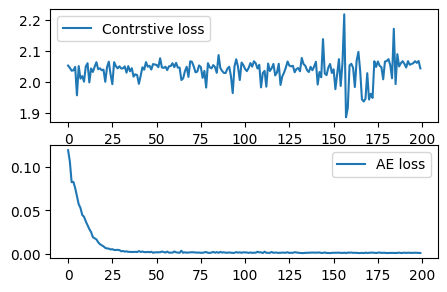

1/1 [==============================] - 0s 101ms/step


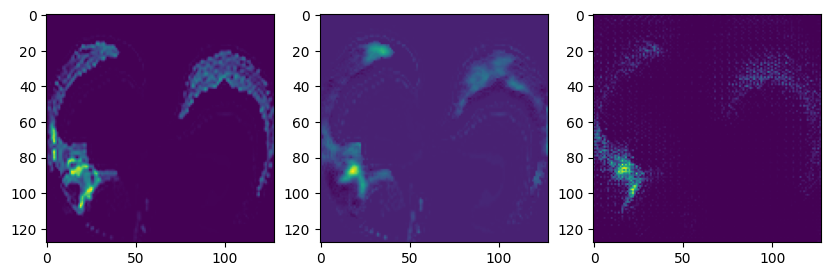

1/1 [==============================] - 0s 103ms/step


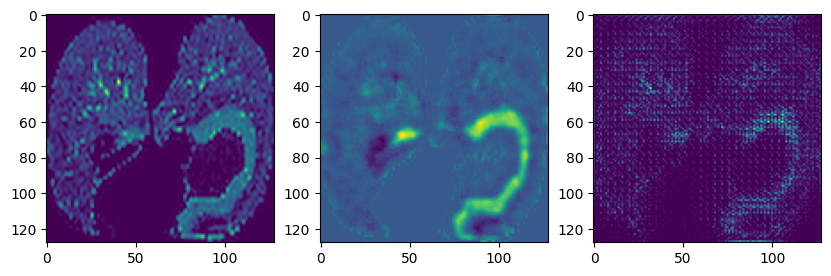

1/1 [==============================] - 0s 107ms/step


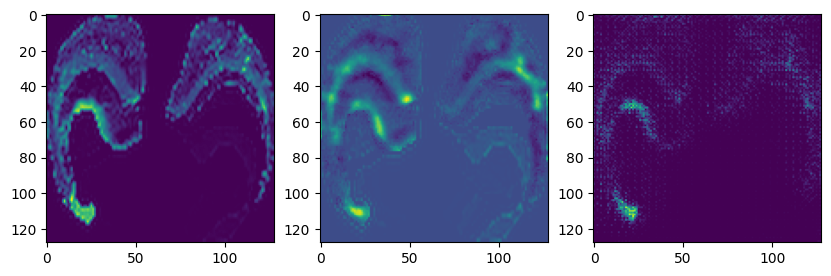

In [19]:
train_for_n(nb_epoch=200,
            plt_frq=50,
            ntrain=8)

## check the result on CoronaCases dataset

In [58]:
### load the model
import keras
BCDU_net_D3_model = keras.models.load_model('/content/drive/MyDrive/finalMosmedDatasetPreProcessed/model/segmentation/1/my_en_de')
BCDU_net_D3_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d_12 (Conv2D)          (None, 128, 128, 32)         320       ['input_2[0][0]']             
                                                                                                  
 conv2d_13 (Conv2D)          (None, 128, 128, 32)         9248      ['conv2d_12[0][0]']           
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)           0         ['conv2d_13[0][0]']           
 g2D)                                                                                       

In [59]:
#### calculate the output of model
def OutPutModel(my_data):
    my_out = []
    for i in tqdm(range(len(my_data))):
        my_out.append(BCDU_net_D3_model.predict(my_data[i][0,:,:,:]))
    return my_out


def Add_Dim(data):
    ################## add a dim to data
    data_scaled = []
    for j in tqdm(range(len(data))):
            output = np.zeros((1,data[j].shape[0],data[j].shape[1],data[j].shape[2],1))
            output[0,:,:,:,0] = data[j][:,:,:]
            data_scaled.append(output)
    return data_scaled



def LoadData(DatasetName):

    ############## Load
    if(DatasetName=='Mosmed_Dataset'):
        Base_data = np.load('/content/drive/MyDrive/Mosmed Dataset 1100 samples/MosmedDatasetTestPreProcessed/BaseCTImages.npy')

        data = np.load('/content/drive/MyDrive/Mosmed Dataset 1100 samples/MosmedDatasetTestPreProcessed/LungImages.npy')

        mask = np.load('/content/drive/MyDrive/Mosmed Dataset 1100 samples/MosmedDatasetTestPreProcessed/InfectionMasks.npy')

        LungMask = np.load('/content/drive/MyDrive/Mosmed Dataset 1100 samples/MosmedDatasetTestPreProcessed/LungMask.npy')

        for i in range(mask.shape[0]):
            mask[i,:,:,:]=np.where(mask[i,:,:,:]>0.5,1,0)
            LungMask[i,:,:,:]=np.where(LungMask[i,:,:,:]>0.0005,1,0)


    if(DatasetName=='UESTC'):
        Base_data = np.load('./BaseCTImages.npy')

        data = np.load('./LungImages.npy')

        mask = np.load('./InfectionMasks.npy')

        LungMask = np.load('./LungMask.npy')
        for i in range(len(mask)):
            mask[i]=np.where(np.array(mask[i])>0.5,1,0)
            LungMask[i]=np.where(np.array(LungMask[i])>0.0005,1,0)


    if(DatasetName=='Radiopedia'):
        Base_data = np.load('./BaseCTImages.npy')

        data = np.load('./LungImages.npy')

        mask = np.load('./InfectionMasks.npy')

        LungMask = np.load('./LungMask.npy')
        for i in range(len(mask[0].shape[0])):
            mask[i]=np.where(np.array(mask[i])>0.5,1,0)
            LungMask[i]=np.where(np.array(LungMask[i])>0.0005,1,0)



    ####################### Add a dim
    ########### add a dim to data
    Data_scaled = Add_Dim(data)

    ########### add a dim to mask
    mask_scaled = Add_Dim(mask)

    ### get output of model
    my_out = OutPutModel(Data_scaled)

    return Data_scaled,my_out, mask_scaled, LungMask


In [60]:
def EvaluateMain(my_data,my_out,mask_scaled,LungMask,Threshold,thresholdMethod,PlotingCase,PlotingSlice,PostPro):
    maxval=1
    dice_list_p = []
    sensitivity_list_p = []
    specificity_list_p = []
    InfectionPercent = []

    for i in tqdm(range(len(my_data))):
        for j in range(my_data[i].shape[1]):
            InfectionPercent.append( (100*mask_scaled[i][0,j,:,:,0].sum())/(LungMask[i][j,:,:].sum()+(10**-9)) )
            diff = my_out[i][j,:,:,0]

            # Thresholding
            npreds = (diff > Threshold*np.amax(diff)) * maxval
            # npreds = filter_isolated_cells(npreds, struct=np.ones((3,3)))

            #### Dice Scores
            dice_list_p.append(DiceScore(np.reshape(mask_scaled[i][0,j,:,:,0],(128*128)), np.reshape( npreds ,(128*128) )))

            #### Sensitivity
            sensitivity_list_p.append(sensitivityScore(np.reshape(mask_scaled[i][0,j,:,:,0],(128*128)), np.reshape( npreds ,(128*128) )))

            #### specificity
            specificity_list_p.append(specificityScore(np.reshape(mask_scaled[i][0,j,:,:,0],(128*128)), np.reshape( npreds ,(128*128) )))

    return dice_list_p ,sensitivity_list_p ,specificity_list_p ,InfectionPercent

In [61]:
# -*- coding: utf-8 -*-
"""Functions.py

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1yyy_cZldykgxxb0ms8i4ZcapminEhoaL
"""

import pickle
import numpy as np
from tqdm import tqdm
from skimage import data
from skimage import filters
from skimage import data
from skimage import filters
from scipy import ndimage
from skimage import data
from skimage import filters
import matplotlib.pyplot as plt
import pickle


def Plot_Slice(my_data,my_out,npreds,mask_scaled,LungMask,NumCase,NumSlice):

    plt.figure(figsize=(15,15))
    plt.subplot(161) # original
    plt.imshow(my_data[NumCase][0,NumSlice,:,:,0])

    plt.subplot(162) # removed
    plt.imshow(my_out[NumCase][NumSlice,:,:,0])

    plt.subplot(163) # generated mask
    plt.imshow(npreds)

    plt.subplot(164) # Real mask
    plt.imshow(mask_scaled[NumCase][0,NumSlice,:,:,0])


def sensitivityScore(label_trues,label_preds):
    sensitivity = []
    if label_trues.sum()>163:
        score_sen = (label_trues*label_preds).sum()/(label_trues.sum()+1e-9)
        sensitivity.append(score_sen)
    return np.array(sensitivity).mean()

def specificityScore(label_trues,label_preds):
    specificity = []
    if label_trues.sum()>163:
        score_spef = ((1-label_trues)*(1-label_preds)).sum()/((1-label_trues).sum()+1e-9)
        specificity.append(score_spef)
    return np.array(specificity).mean()


def DiceScore(label_trues,label_preds):
    dice = []
    if label_trues.sum()>163:
        score = (2*(label_trues*label_preds).sum())/(label_trues.sum()+label_preds.sum()+1e-9)
        dice.append(score)
    return np.array(dice).mean()


def PlotingResults(dice_list,InfectionPercent,ScoreName=''):
    dice_list = np.array(dice_list)
    InfectionPercent = np.array(InfectionPercent)
    Data_up1per= dice_list[np.where(( (InfectionPercent> 1) ))]
    print(ScoreName,"Mean:", 100*np.array(Data_up1per)[~np.isnan(Data_up1per)].mean() ,ScoreName,"Std:", 100*np.array(Data_up1per)[~np.isnan(Data_up1per)].std() )


In [62]:
#### upload data
my_data, my_out, mask_scaled, LungMask = LoadData("Mosmed_Dataset")


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 [==============================] - 5s 5s/step


  2%|▏         | 1/50 [00:04<04:00,  4.90s/it]

1/1 [==============================] - 5s 5s/step


  4%|▍         | 2/50 [00:09<03:46,  4.72s/it]

1/1 [==============================] - 5s 5s/step


  6%|▌         | 3/50 [00:19<05:40,  7.25s/it]

1/1 [==============================] - 5s 5s/step


  8%|▊         | 4/50 [00:30<06:28,  8.44s/it]

1/1 [==============================] - 5s 5s/step


 10%|█         | 5/50 [00:35<05:26,  7.25s/it]

1/1 [==============================] - 5s 5s/step


 12%|█▏        | 6/50 [00:40<04:48,  6.55s/it]

1/1 [==============================] - 5s 5s/step


 14%|█▍        | 7/50 [00:45<04:22,  6.09s/it]

1/1 [==============================] - 5s 5s/step


 16%|█▌        | 8/50 [00:55<05:11,  7.42s/it]

1/1 [==============================] - 5s 5s/step


 18%|█▊        | 9/50 [01:00<04:35,  6.71s/it]

1/1 [==============================] - 5s 5s/step


 20%|██        | 10/50 [01:06<04:09,  6.24s/it]

1/1 [==============================] - 4s 4s/step


 22%|██▏       | 11/50 [01:10<03:42,  5.72s/it]

1/1 [==============================] - 5s 5s/step


 24%|██▍       | 12/50 [01:15<03:31,  5.56s/it]

1/1 [==============================] - 5s 5s/step


 26%|██▌       | 13/50 [01:21<03:24,  5.52s/it]

1/1 [==============================] - 9s 9s/step


 28%|██▊       | 14/50 [01:31<04:10,  6.97s/it]

1/1 [==============================] - 8s 8s/step


 30%|███       | 15/50 [01:42<04:40,  8.01s/it]

1/1 [==============================] - 5s 5s/step


 32%|███▏      | 16/50 [01:46<03:58,  7.03s/it]

1/1 [==============================] - 5s 5s/step


 34%|███▍      | 17/50 [01:52<03:35,  6.52s/it]

1/1 [==============================] - 5s 5s/step


 36%|███▌      | 18/50 [01:56<03:10,  5.94s/it]

1/1 [==============================] - 5s 5s/step


 38%|███▊      | 19/50 [02:01<02:56,  5.70s/it]

1/1 [==============================] - 5s 5s/step


 40%|████      | 20/50 [02:07<02:46,  5.56s/it]

1/1 [==============================] - 5s 5s/step


 42%|████▏     | 21/50 [02:12<02:37,  5.44s/it]

1/1 [==============================] - 5s 5s/step


 44%|████▍     | 22/50 [02:22<03:12,  6.89s/it]

1/1 [==============================] - 5s 5s/step


 46%|████▌     | 23/50 [02:27<02:51,  6.36s/it]

1/1 [==============================] - 5s 5s/step


 48%|████▊     | 24/50 [02:37<03:16,  7.54s/it]

1/1 [==============================] - 5s 5s/step


 50%|█████     | 25/50 [02:48<03:29,  8.36s/it]

1/1 [==============================] - 5s 5s/step


 52%|█████▏    | 26/50 [02:53<02:58,  7.44s/it]

1/1 [==============================] - 5s 5s/step


 54%|█████▍    | 27/50 [02:58<02:33,  6.67s/it]

1/1 [==============================] - 5s 5s/step


 56%|█████▌    | 28/50 [03:02<02:13,  6.05s/it]

1/1 [==============================] - 5s 5s/step


 58%|█████▊    | 29/50 [03:08<02:03,  5.86s/it]

1/1 [==============================] - 4s 4s/step


 60%|██████    | 30/50 [03:12<01:49,  5.46s/it]

1/1 [==============================] - 7s 7s/step


 62%|██████▏   | 31/50 [03:20<01:53,  5.97s/it]

1/1 [==============================] - 5s 5s/step


 64%|██████▍   | 32/50 [03:24<01:40,  5.57s/it]

1/1 [==============================] - 5s 5s/step


 66%|██████▌   | 33/50 [03:29<01:32,  5.45s/it]

1/1 [==============================] - 5s 5s/step


 68%|██████▊   | 34/50 [03:40<01:50,  6.90s/it]

1/1 [==============================] - 5s 5s/step


 70%|███████   | 35/50 [03:50<01:58,  7.91s/it]

1/1 [==============================] - 5s 5s/step


 72%|███████▏  | 36/50 [03:55<01:37,  6.99s/it]

1/1 [==============================] - 5s 5s/step


 74%|███████▍  | 37/50 [04:00<01:23,  6.40s/it]

1/1 [==============================] - 5s 5s/step


 76%|███████▌  | 38/50 [04:04<01:10,  5.86s/it]

1/1 [==============================] - 5s 5s/step


 78%|███████▊  | 39/50 [04:10<01:02,  5.67s/it]

1/1 [==============================] - 5s 5s/step


 80%|████████  | 40/50 [04:15<00:55,  5.52s/it]

1/1 [==============================] - 5s 5s/step


 82%|████████▏ | 41/50 [04:20<00:48,  5.41s/it]

1/1 [==============================] - 5s 5s/step


 84%|████████▍ | 42/50 [04:25<00:42,  5.29s/it]

1/1 [==============================] - 4s 4s/step


 86%|████████▌ | 43/50 [04:30<00:35,  5.06s/it]

1/1 [==============================] - 5s 5s/step


 88%|████████▊ | 44/50 [04:40<00:39,  6.62s/it]

1/1 [==============================] - 5s 5s/step


 90%|█████████ | 45/50 [04:50<00:38,  7.72s/it]

1/1 [==============================] - 5s 5s/step


 92%|█████████▏| 46/50 [04:55<00:27,  6.95s/it]

1/1 [==============================] - 5s 5s/step


 94%|█████████▍| 47/50 [05:00<00:19,  6.43s/it]

1/1 [==============================] - 5s 5s/step


 96%|█████████▌| 48/50 [05:05<00:11,  5.88s/it]

1/1 [==============================] - 5s 5s/step


 98%|█████████▊| 49/50 [05:15<00:07,  7.19s/it]

1/1 [==============================] - 8s 8s/step


100%|██████████| 50/50 [05:23<00:00,  6.48s/it]


In [63]:
####### Calculating the evaluation metrics(Dice score, Specificity, Sensitivity )
dice_list, sensitivity_list, specificity_list, InfectionPercent = EvaluateMain(my_data,my_out,mask_scaled,LungMask,Threshold= 0.2,thresholdMethod='1',
                                                                                      PlotingCase=10,PlotingSlice=15,PostPro=False)

############### ploting resuts

### Dice score
PlotingResults(dice_list ,InfectionPercent,ScoreName='Dice score')

##### Sensitivity
PlotingResults(sensitivity_list,InfectionPercent,ScoreName='Sensitivity')

##### Specificity
PlotingResults(specificity_list,InfectionPercent,ScoreName='specificity')



  0%|          | 0/50 [00:00<?, ?it/s]<ipython-input-61-3defcf20863f>:60: RuntimeWarning: Mean of empty slice.
  return np.array(dice).mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-61-3defcf20863f>:45: RuntimeWarning: Mean of empty slice.
  return np.array(sensitivity).mean()
<ipython-input-61-3defcf20863f>:52: RuntimeWarning: Mean of empty slice.
  return np.array(specificity).mean()
100%|██████████| 50/50 [00:00<00:00, 209.32it/s]

Dice score Mean: 17.277437110090542 Dice score Std: 9.548132168751385
Sensitivity Mean: 72.04484272445009 Sensitivity Std: 12.21210055418031
specificity Mean: 82.20381682416212 specificity Std: 6.6475942304927464


In [ ]:
!pip list

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   21.1.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl